<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>Project 5 and 6: <i>A reproducible guide to RNA-seq and differential gene expression analysis</i></h3>
    <h4>Deadline: 11:59PM, December 4th, 2023</h4>
    <h4>Total Points: 600</h4>
    
</div>

<div class="alert alert-block alert-danger">
    <h3>Alert!</h3>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

<div class="alert alert-block alert-info">
    <h2>Before you start, please read the following points carefully:</h2>
    <p>1. The objective of this project is to create a reproducible guide for RNA-seq data analysis followed by diffrential gene expression.</p>
    <p>2. This end goal of this notebook is to find up-and-down regulated transcripts between cases and controls, as defined by a randomized controlled trial. (This could be a disease-normal, drug-placebo, or high-low dose comparison)</p>
    <p>3. The n (cases + control samples) can be as low as 16 (eg: 8 cases and 8 controls) and can go up to 50</p>
    <p>4. RNA-seq analysis can be performed using Salmon, Kallisto, or Star (other tools exist, but we'll restrict to these three)</p>
    <p>5. <b>Using RStudio on Pace-ICE:</b> Please feel free to to use RStudio for diffrential gene expression analysis part of this project. Diffrential gene expression analysis can be performed using DESeq2, Sleuth, or EdgeR. DESeq2 is available in Python & R, meanwhile other tools might need to be installed during the R-Studio session on pace-ice. </p>
    <p>6. We will accept one R script file (in addition to this notebook) for this project's submission. Please make sure the RScript is well commented. It is up to you how you want structure this guide!</p>
    <hr>
    <p><b>Finally:</b> This is a much more open ended project compared to the last 4 ones. You will pick the data yourself and evaluate the findings. Please explain whatever work you have done <u>in as much detail as possible</u>. All commands and comments are essential. 
        
<p><b>Think:</b> as if your notebook will be used by another MS student who has very little idea about RNA-seq & diffrential gene expression analyses.</p>
</div>

---

# **1. Finding the right data**
### *Total Questions: 3*
### *Total Points: 60+20+20 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Locate samples for RNA-seq data analysis</h3>
    <p>SRA is a great resource to start with. Search for a disease or drug of interest, use appropriate filters and locate RNA-seq data files that are publically available. Ideally, stick to one SRA project and make sure the RNA-seq files are coming from a regular NGS run (they should be fastq files) </p> 
    
    
    
<p>Explain what experiment the data is coming from, how many cases/controls etc.</p>
</div>

The data is coming from PRJNA128733 project. This project sequenced the transcriptome (polyA+) of 20 prostate cancer tumors and 10 matched normal tissues using Illumina GAII platform and then used bioinformatic approaches to identify prostate cancer specific aberrations which include gene fusion, alternative splicing, somatic mutation.

However, for this specific notebook, we selected 10 normal tissues and 10 cancer tumors with Gleason score of 7.

<div class="alert alert-block alert-warning">
    <h3>1.2 Download the data</h3>
    <p>Figure out how and where you will save these data files. Write the commands and show the final downloaded files using <i>ls -lh</i></p>
</div>

In [4]:
### Takes a list of accession ids and gets them from SRA.
### Output is multiple directories with the accession id as the name and within them, a .sra file
!xargs -n 1 prefetch -O /home/hice1/amohan321/scratch/Project5/ < SRR_Acc_List.txt


2023-11-28T21:13:13 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-11-28T21:13:13 prefetch.3.0.8: 1) Downloading 'SRR057649'...
2023-11-28T21:13:13 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-11-28T21:13:13 prefetch.3.0.8:  Downloading via HTTPS...
2023-11-28T21:13:38 prefetch.3.0.8:  HTTPS download succeed
2023-11-28T21:13:38 prefetch.3.0.8:  'SRR057649' is valid
2023-11-28T21:13:38 prefetch.3.0.8: 1) 'SRR057649' was downloaded successfully

2023-11-28T21:13:39 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-11-28T21:13:39 prefetch.3.0.8: 1) Downloading 'SRR057650'...
2023-11-28T21:13:39 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2

2023-11-28T21:18:35 prefetch.3.0.8: 1) Downloading 'SRR057633'...
2023-11-28T21:18:35 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-11-28T21:18:35 prefetch.3.0.8:  Downloading via HTTPS...
2023-11-28T21:19:04 prefetch.3.0.8:  HTTPS download succeed
2023-11-28T21:19:06 prefetch.3.0.8:  'SRR057633' is valid
2023-11-28T21:19:06 prefetch.3.0.8: 1) 'SRR057633' was downloaded successfully

2023-11-28T21:19:07 prefetch.3.0.8: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2023-11-28T21:19:07 prefetch.3.0.8: 1) Downloading 'SRR057634'...
2023-11-28T21:19:07 prefetch.3.0.8: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2023-11-28T21:19:07 prefetch.3.0.8:  Downloading via HTTPS...
2023-11-28T21:19:22 prefetch.3.0.8:  HTTPS download succeed
2023-11-28T21

In [3]:
### using fastq-dump, converts .sra file into _1.fastq and _2.fastq within their respective directories.

!for file in $(cat /home/hice1/amohan321/my_version_biol6150/Project5_6/SRR_Acc_List.txt); do fastq-dump --split-3 --gzip --skip-technical /home/hice1/amohan321/scratch/Project5/$file/${file}.sra -O /home/hice1/amohan321/scratch/Project5/; done

Read 4087356 spots for /home/hice1/amohan321/scratch/Project5/SRR057649/SRR057649.sra
Written 4087356 spots for /home/hice1/amohan321/scratch/Project5/SRR057649/SRR057649.sra
Read 4005942 spots for /home/hice1/amohan321/scratch/Project5/SRR057650/SRR057650.sra
Written 4005942 spots for /home/hice1/amohan321/scratch/Project5/SRR057650/SRR057650.sra
Read 4001312 spots for /home/hice1/amohan321/scratch/Project5/SRR057651/SRR057651.sra
Written 4001312 spots for /home/hice1/amohan321/scratch/Project5/SRR057651/SRR057651.sra
Read 14676269 spots for /home/hice1/amohan321/scratch/Project5/SRR057658/SRR057658.sra
Written 14676269 spots for /home/hice1/amohan321/scratch/Project5/SRR057658/SRR057658.sra
Read 2643821 spots for /home/hice1/amohan321/scratch/Project5/SRR057652/SRR057652.sra
Written 2643821 spots for /home/hice1/amohan321/scratch/Project5/SRR057652/SRR057652.sra
Read 2819507 spots for /home/hice1/amohan321/scratch/Project5/SRR057653/SRR057653.sra
Written 2819507 spots for /home/hice1

In [4]:
### Listing out the files in each of the directories

!ls -lh /home/hice1/amohan321/scratch/Project5/

total 18G
drwxr-xr-x 3 amohan321 gtperson 4.0K Nov 29 00:38 SRR057629
-rw-r--r-- 1 amohan321 gtperson 248M Nov 29 01:19 SRR057629_1.fastq.gz
-rw-r--r-- 1 amohan321 gtperson 248M Nov 29 01:19 SRR057629_2.fastq.gz
drwxr-xr-x 3 amohan321 gtperson 4.0K Nov 29 00:38 SRR057630
-rw-r--r-- 1 amohan321 gtperson 189M Nov 29 01:20 SRR057630_1.fastq.gz
-rw-r--r-- 1 amohan321 gtperson 188M Nov 29 01:20 SRR057630_2.fastq.gz
drwxr-xr-x 3 amohan321 gtperson 4.0K Nov 29 00:39 SRR057632
-rw-r--r-- 1 amohan321 gtperson 301M Nov 29 01:23 SRR057632_1.fastq.gz
-rw-r--r-- 1 amohan321 gtperson 300M Nov 29 01:23 SRR057632_2.fastq.gz
drwxr-xr-x 3 amohan321 gtperson 4.0K Nov 29 00:39 SRR057633
-rw-r--r-- 1 amohan321 gtperson 675M Nov 29 01:28 SRR057633_1.fastq.gz
-rw-r--r-- 1 amohan321 gtperson 663M Nov 29 01:28 SRR057633_2.fastq.gz
drwxr-xr-x 3 amohan321 gtperson 4.0K Nov 29 00:39 SRR057634
-rw-r--r-- 1 amohan321 gtperson 193M Nov 29 01:30 SRR057634_1.fastq.gz
-rw-r--r-- 1 amohan321 gtperson 192M Nov 29 01:30 S

<div class="alert alert-block alert-warning">
    <h3>1.3 Talk about the RNA-seq files</h3>
    <p>Summarize the study from which you have extracted the RNA-seq data files. Are there any genes/transcripts you expect to find up-or-down regulated?</p>
</div>

In this BMC Genomics paper - entitled “Characterization of kinase gene expression and splicing profile in prostate cancer with RNA-Seq data” - Feng et al. (2018) characterized the transcriptome profile of prostate cancer using RNA-Seq data. The analysis pipeline they used involved three key steps: (1) mapping of short sequencing reads to the human reference genome using TopHat, (2) differential expression analysis using DEGseq, and (3) differential splicing analysis using DSGseq and DEXSeq. To identify differentially expressed (DE) genes, the researchers employed statistical significance cut-offs such as p-value < 0.05 and false discovery rate (FDR) < 1%. They then focused on kinase genes, which are a vital gene family in cancer regulation, specifying those that were differentially expressed. Further analyses included Gene Ontology (GO) and KEGG pathway enrichment analyses to further show the biological functions associated with DE and differentially spliced (DS) genes. The key finding was the identification of CDK5 as a kinase gene that undergoes isoform switching between prostate cancer and benign cells/tissues. RNA-Seq was used on alternate prostate cancer cell lines dataset to further validate their findings. To determine the functional impact of alternative splicing on kinase activity, Pfam domain searches were conducted, revealing that differentially spliced exons of DS kinases were enriched in the protein kinase domain, suggesting a potential influence of alternative splicing on kinase activity in prostate cancer. According to the paper, there are a total of 20 genes that we expect to be up-regulated (10) or down-regulated (10). The top up-regulated gene in prostate cancer is phospholipase A2 group (PLA2G2A) and the top down-regulated gene is serpin peptidase inhibitor, clade A (alpha-1 antiproteinase, antitrypsin) member 3 (SERPINA3).

There will be uo-or-down regulated genees/transcripts because of the impact of cancer, which leads to either up-regulation or down-regulation of certain genes.

# **2. Quality control**
### *Total Questions: 2*
### *Total Points: 50+50 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Pre-QC</h3>
    <p>Run the tools of your choice to summarize the read quality contained in your fastq files. Contrary to last time, you now have multiple fastq files (minimum 15 pairs). Sometimes results from QC tools are also summarized in simple text files which can be read using a simple piece of code and summarized using graphs in python.</p>
</div>

In [5]:
### Make a dir to save all the pre-trim qc data

!mkdir /home/hice1/amohan321/scratch/Project5/PreTrimQC

In [2]:
### To see the preQC data

!for file in $(cat /home/hice1/amohan321/my_version_biol6150/Project5_6/SRR_Acc_List.txt); do fastqc -o /home/hice1/amohan321/scratch/Project5/PreTrimQC/ /home/hice1/amohan321/scratch/Project5/${file}_1.fastq.gz /home/hice1/amohan321/scratch/Project5/${file}_2.fastq.gz; done

application/gzip
Started analysis of SRR057649_1.fastq.gz
application/gzip
Approx 5% complete for SRR057649_1.fastq.gz
Approx 10% complete for SRR057649_1.fastq.gz
Approx 15% complete for SRR057649_1.fastq.gz
Approx 20% complete for SRR057649_1.fastq.gz
Approx 25% complete for SRR057649_1.fastq.gz
Approx 30% complete for SRR057649_1.fastq.gz
Approx 35% complete for SRR057649_1.fastq.gz
Approx 40% complete for SRR057649_1.fastq.gz
Approx 45% complete for SRR057649_1.fastq.gz
Approx 50% complete for SRR057649_1.fastq.gz
Approx 55% complete for SRR057649_1.fastq.gz
Approx 60% complete for SRR057649_1.fastq.gz
Approx 65% complete for SRR057649_1.fastq.gz
Approx 70% complete for SRR057649_1.fastq.gz
Approx 75% complete for SRR057649_1.fastq.gz
Approx 80% complete for SRR057649_1.fastq.gz
Approx 85% complete for SRR057649_1.fastq.gz
Approx 90% complete for SRR057649_1.fastq.gz
Approx 95% complete for SRR057649_1.fastq.gz
Analysis complete for SRR057649_1.fastq.gz
Started analysis of SRR05764

Approx 60% complete for SRR057652_1.fastq.gz
Approx 65% complete for SRR057652_1.fastq.gz
Approx 70% complete for SRR057652_1.fastq.gz
Approx 75% complete for SRR057652_1.fastq.gz
Approx 80% complete for SRR057652_1.fastq.gz
Approx 85% complete for SRR057652_1.fastq.gz
Approx 90% complete for SRR057652_1.fastq.gz
Approx 95% complete for SRR057652_1.fastq.gz
Analysis complete for SRR057652_1.fastq.gz
Started analysis of SRR057652_2.fastq.gz
Approx 5% complete for SRR057652_2.fastq.gz
Approx 10% complete for SRR057652_2.fastq.gz
Approx 15% complete for SRR057652_2.fastq.gz
Approx 20% complete for SRR057652_2.fastq.gz
Approx 25% complete for SRR057652_2.fastq.gz
Approx 30% complete for SRR057652_2.fastq.gz
Approx 35% complete for SRR057652_2.fastq.gz
Approx 40% complete for SRR057652_2.fastq.gz
Approx 45% complete for SRR057652_2.fastq.gz
Approx 50% complete for SRR057652_2.fastq.gz
Approx 55% complete for SRR057652_2.fastq.gz
Approx 60% complete for SRR057652_2.fastq.gz
Approx 65% comple

Approx 20% complete for SRR057656_2.fastq.gz
Approx 25% complete for SRR057656_2.fastq.gz
Approx 30% complete for SRR057656_2.fastq.gz
Approx 35% complete for SRR057656_2.fastq.gz
Approx 40% complete for SRR057656_2.fastq.gz
Approx 45% complete for SRR057656_2.fastq.gz
Approx 50% complete for SRR057656_2.fastq.gz
Approx 55% complete for SRR057656_2.fastq.gz
Approx 60% complete for SRR057656_2.fastq.gz
Approx 65% complete for SRR057656_2.fastq.gz
Approx 70% complete for SRR057656_2.fastq.gz
Approx 75% complete for SRR057656_2.fastq.gz
Approx 80% complete for SRR057656_2.fastq.gz
Approx 85% complete for SRR057656_2.fastq.gz
Approx 90% complete for SRR057656_2.fastq.gz
Approx 95% complete for SRR057656_2.fastq.gz
Analysis complete for SRR057656_2.fastq.gz
application/gzip
application/gzip
Started analysis of SRR057657_1.fastq.gz
Approx 5% complete for SRR057657_1.fastq.gz
Approx 10% complete for SRR057657_1.fastq.gz
Approx 15% complete for SRR057657_1.fastq.gz
Approx 20% complete for SRR0

Approx 85% complete for SRR057632_2.fastq.gz
Approx 90% complete for SRR057632_2.fastq.gz
Approx 95% complete for SRR057632_2.fastq.gz
Analysis complete for SRR057632_2.fastq.gz
application/gzip
application/gzip
Started analysis of SRR057633_1.fastq.gz
Approx 5% complete for SRR057633_1.fastq.gz
Approx 10% complete for SRR057633_1.fastq.gz
Approx 15% complete for SRR057633_1.fastq.gz
Approx 20% complete for SRR057633_1.fastq.gz
Approx 25% complete for SRR057633_1.fastq.gz
Approx 30% complete for SRR057633_1.fastq.gz
Approx 35% complete for SRR057633_1.fastq.gz
Approx 40% complete for SRR057633_1.fastq.gz
Approx 45% complete for SRR057633_1.fastq.gz
Approx 50% complete for SRR057633_1.fastq.gz
Approx 55% complete for SRR057633_1.fastq.gz
Approx 60% complete for SRR057633_1.fastq.gz
Approx 65% complete for SRR057633_1.fastq.gz
Approx 70% complete for SRR057633_1.fastq.gz
Approx 75% complete for SRR057633_1.fastq.gz
Approx 80% complete for SRR057633_1.fastq.gz
Approx 85% complete for SRR0

Approx 40% complete for SRR057644_1.fastq.gz
Approx 45% complete for SRR057644_1.fastq.gz
Approx 50% complete for SRR057644_1.fastq.gz
Approx 55% complete for SRR057644_1.fastq.gz
Approx 60% complete for SRR057644_1.fastq.gz
Approx 65% complete for SRR057644_1.fastq.gz
Approx 70% complete for SRR057644_1.fastq.gz
Approx 75% complete for SRR057644_1.fastq.gz
Approx 80% complete for SRR057644_1.fastq.gz
Approx 85% complete for SRR057644_1.fastq.gz
Approx 90% complete for SRR057644_1.fastq.gz
Approx 95% complete for SRR057644_1.fastq.gz
Analysis complete for SRR057644_1.fastq.gz
Started analysis of SRR057644_2.fastq.gz
Approx 5% complete for SRR057644_2.fastq.gz
Approx 10% complete for SRR057644_2.fastq.gz
Approx 15% complete for SRR057644_2.fastq.gz
Approx 20% complete for SRR057644_2.fastq.gz
Approx 25% complete for SRR057644_2.fastq.gz
Approx 30% complete for SRR057644_2.fastq.gz
Approx 35% complete for SRR057644_2.fastq.gz
Approx 40% complete for SRR057644_2.fastq.gz
Approx 45% comple

In [3]:
### Run MultiQC on the PreTrimQC data

!multiqc /home/hice1/amohan321/scratch/Project5/PreTrimQC/ -o /home/hice1/amohan321/scratch/Project5/PreTrimQC/


  /// ]8;id=94060;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.18

|           multiqc | Search path : /home/hice1/amohan321/scratch/Project5/PreTrimQC
|         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 80/80  0m  
|            fastqc | Found 40 reports
|           multiqc | Report      : ../../scratch/Project5/PreTrimQC/multiqc_report.html
|           multiqc | Data        : ../../scratch/Project5/PreTrimQC/multiqc_data
|           multiqc | MultiQC complete


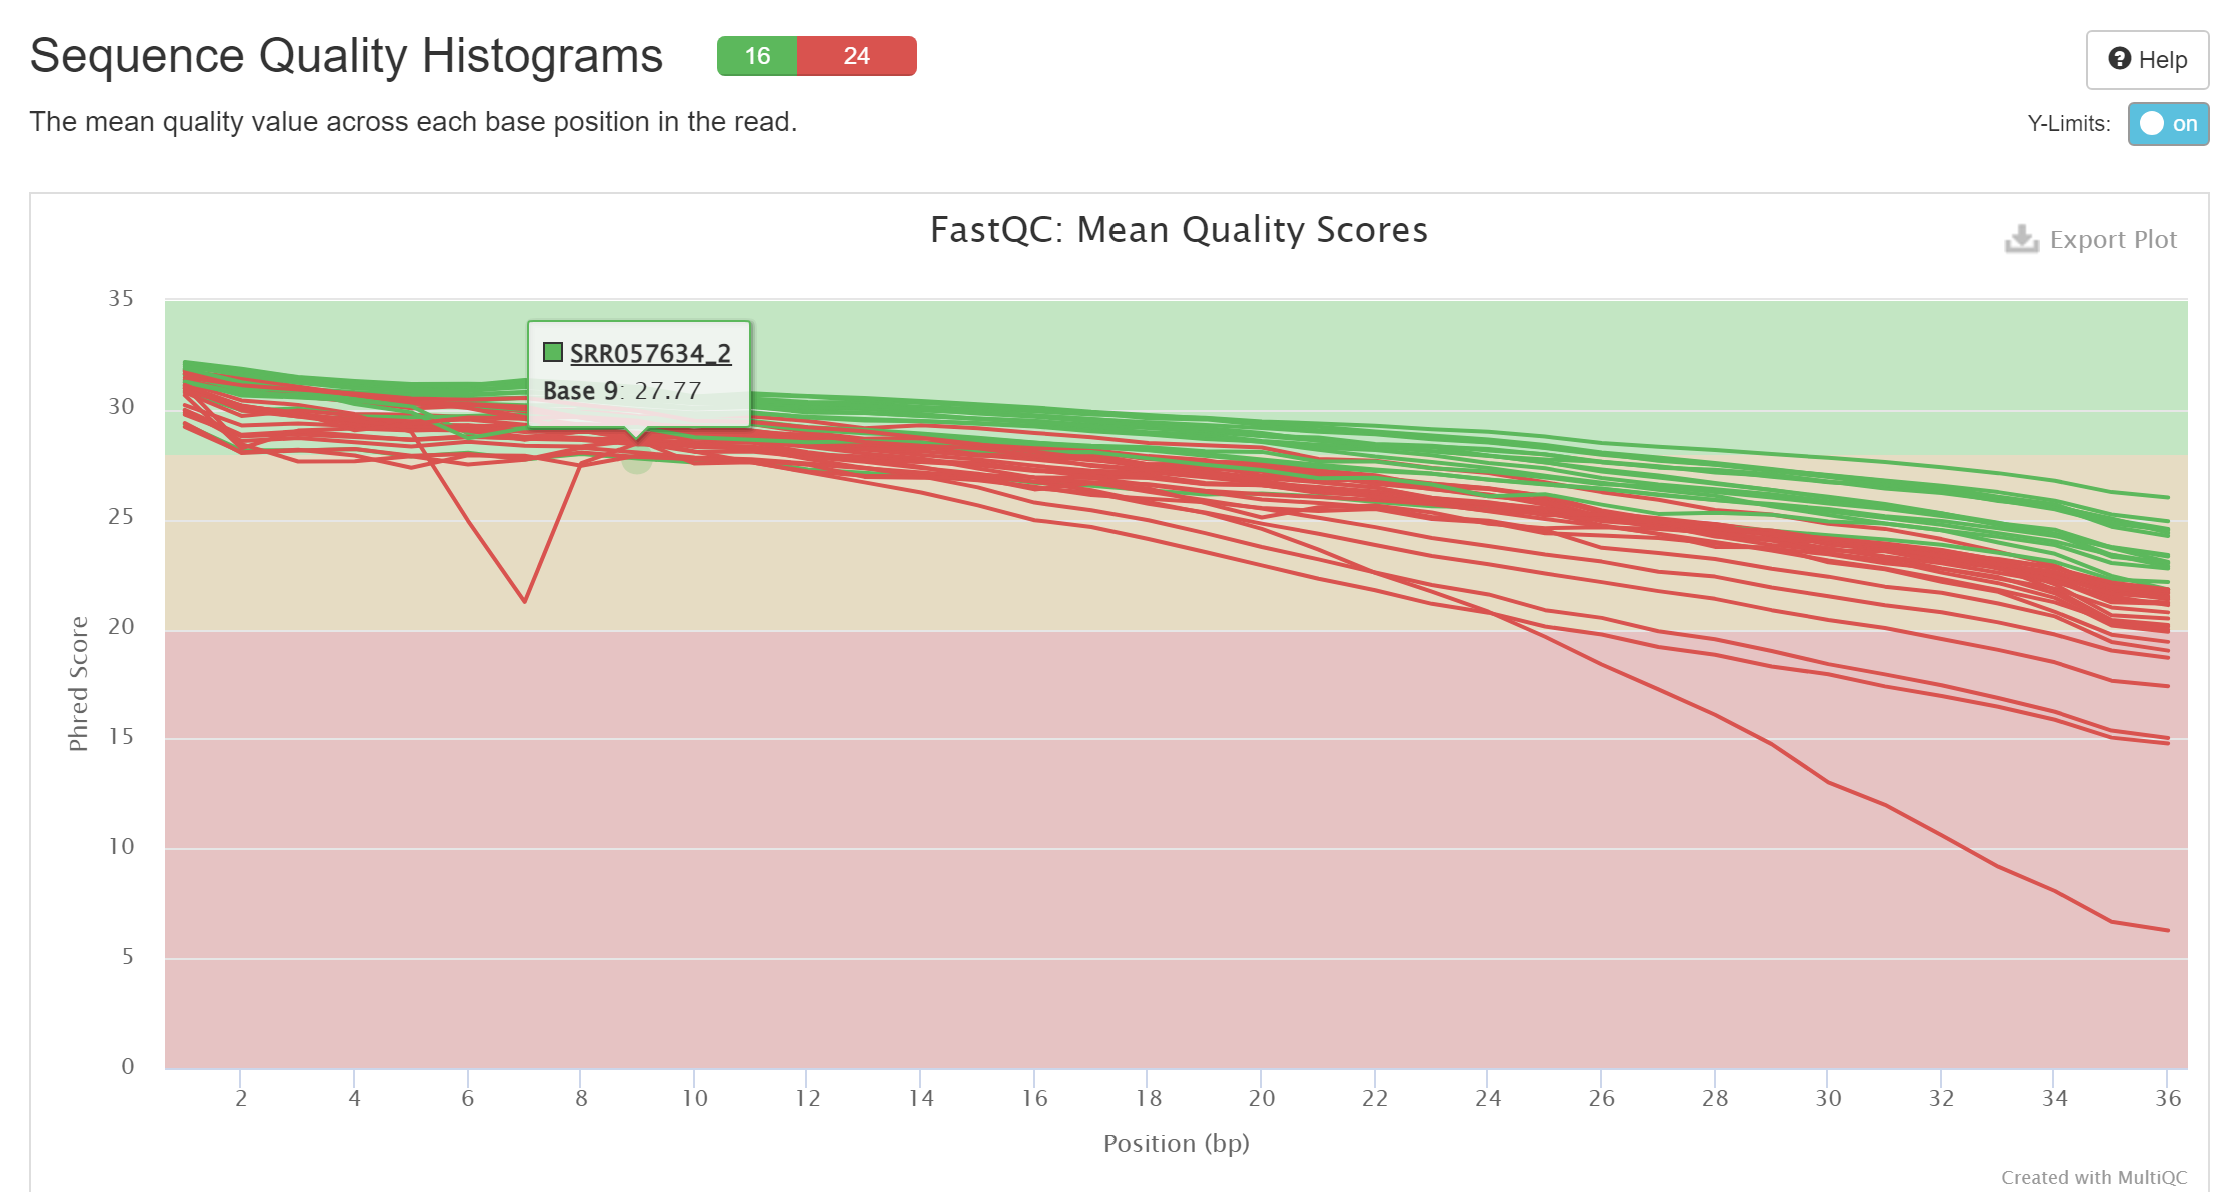

<div class="alert alert-block alert-warning">
    <h3>2.2 Post-QC</h3>
    <p>How and what did you trim/prune? Show your commands of the tools used and summarize the final fastq files.</p>
</div>

In [9]:
### Create dir to store trimmed data

!mkdir /home/hice1/amohan321/scratch/Project5/Trimmed_data

In [23]:
### Trimming using fastp

!for file in $(cat /home/hice1/amohan321/my_version_biol6150/Project5_6/SRR_Acc_List.txt); do fastp -i /home/hice1/amohan321/scratch/Project5/${file}_1.fastq.gz -I /home/hice1/amohan321/scratch/Project5/${file}_2.fastq.gz -o /home/hice1/amohan321/scratch/Project5/Trimmed_data/${file}_trimmed_1.fastq.gz -O /home/hice1/amohan321/scratch/Project5/Trimmed_data/${file}_trimmed_2.fastq.gz --detect_adapter_for_pe -q 25; done

Detecting adapter sequence for read1...
No adapter detected for read1

Detecting adapter sequence for read2...
No adapter detected for read2

Read1 before filtering:
total reads: 4087356
total bases: 147144816
Q20 bases: 124522198(84.6256%)
Q30 bases: 75268167(51.1524%)

Read2 before filtering:
total reads: 4087356
total bases: 147144816
Q20 bases: 119455722(81.1824%)
Q30 bases: 73827996(50.1737%)

Read1 after filtering:
total reads: 2480347
total bases: 89213606
Q20 bases: 81821008(91.7136%)
Q30 bases: 55079645(61.7391%)

Read2 after filtering:
total reads: 2480347
total bases: 89213606
Q20 bases: 81622709(91.4913%)
Q30 bases: 55935534(62.6984%)

Filtering result:
reads passed filter: 4960694
reads failed due to low quality: 3213934
reads failed due to too many N: 84
reads failed due to too short: 0
reads with adapter trimmed: 87508
bases trimmed due to adapters: 248146

Duplication rate: 1.41764%

Insert size peak (evaluated by paired-end reads): 41

JSON report: fastp.json
HTML repo

Detecting adapter sequence for read1...
No adapter detected for read1

Detecting adapter sequence for read2...
No adapter detected for read2

Read1 before filtering:
total reads: 14761953
total bases: 531430308
Q20 bases: 484463316(91.1622%)
Q30 bases: 340525892(64.0772%)

Read2 before filtering:
total reads: 14761953
total bases: 531430308
Q20 bases: 392096582(73.7814%)
Q30 bases: 261724627(49.2491%)

Read1 after filtering:
total reads: 8464538
total bases: 304521108
Q20 bases: 290742661(95.4754%)
Q30 bases: 218422468(71.7265%)

Read2 after filtering:
total reads: 8464538
total bases: 304521108
Q20 bases: 278351288(91.4062%)
Q30 bases: 199072811(65.3724%)

Filtering result:
reads passed filter: 16929076
reads failed due to low quality: 12594784
reads failed due to too many N: 46
reads failed due to too short: 0
reads with adapter trimmed: 639068
bases trimmed due to adapters: 1936998

Duplication rate: 3.6458%

Insert size peak (evaluated by paired-end reads): 41

JSON report: fastp.j

Detecting adapter sequence for read1...
CGGTTCAGCAGGAATGCCGAGATCGGAAGAGCGGT

Detecting adapter sequence for read2...
CGGCATTCCTGCTGAACCGAGATCGGAAGAGCGTC

Read1 before filtering:
total reads: 6569095
total bases: 236487420
Q20 bases: 207572540(87.7732%)
Q30 bases: 137461469(58.1263%)

Read2 before filtering:
total reads: 6569095
total bases: 236487420
Q20 bases: 207296628(87.6565%)
Q30 bases: 142729653(60.354%)

Read1 after filtering:
total reads: 4899650
total bases: 176294020
Q20 bases: 163504100(92.7451%)
Q30 bases: 115728393(65.6451%)

Read2 after filtering:
total reads: 4899650
total bases: 176291572
Q20 bases: 164433731(93.2737%)
Q30 bases: 120483492(68.3433%)

Filtering result:
reads passed filter: 9799300
reads failed due to low quality: 3292678
reads failed due to too many N: 86
reads failed due to too short: 46126
reads with adapter trimmed: 127798
bases trimmed due to adapters: 2045336

Duplication rate: 3.33101%

Insert size peak (evaluated by paired-end reads): 41

JSON rep

Detecting adapter sequence for read1...
CGGTTCAGCAGGAATGCCGAGATCGGAAGAGCGGT

Detecting adapter sequence for read2...
CAAAAACATAAAGAAAGGCCCGGCGCCATTCTATC

Read1 before filtering:
total reads: 16426232
total bases: 591344352
Q20 bases: 550178788(93.0386%)
Q30 bases: 406437338(68.7311%)

Read2 before filtering:
total reads: 16426232
total bases: 591344352
Q20 bases: 515496170(87.1736%)
Q30 bases: 381517065(64.5169%)

Read1 after filtering:
total reads: 13049219
total bases: 469650084
Q20 bases: 450035034(95.8235%)
Q30 bases: 346939184(73.8718%)

Read2 after filtering:
total reads: 13049219
total bases: 469394744
Q20 bases: 444348731(94.6642%)
Q30 bases: 342833486(73.0374%)

Filtering result:
reads passed filter: 26098438
reads failed due to low quality: 6706266
reads failed due to too many N: 2194
reads failed due to too short: 45566
reads with adapter trimmed: 249243
bases trimmed due to adapters: 3287294

Duplication rate: 7.71643%

Insert size peak (evaluated by paired-end reads): 41



In [5]:
### Make a dir to save all the post-trim qc data

!mkdir /home/hice1/amohan321/scratch/Project5/Post_TrimQC

In [24]:
### To see the postQC data

!for file in $(cat /home/hice1/amohan321/my_version_biol6150/Project5_6/SRR_Acc_List.txt); do fastqc -o /home/hice1/amohan321/scratch/Project5/Post_TrimQC/ /home/hice1/amohan321/scratch/Project5/Trimmed_data/${file}_trimmed_1.fastq.gz /home/hice1/amohan321/scratch/Project5/Trimmed_data/${file}_trimmed_2.fastq.gz; done

application/gzip
application/gzip
Started analysis of SRR057649_trimmed_1.fastq.gz
Approx 5% complete for SRR057649_trimmed_1.fastq.gz
Approx 10% complete for SRR057649_trimmed_1.fastq.gz
Approx 15% complete for SRR057649_trimmed_1.fastq.gz
Approx 20% complete for SRR057649_trimmed_1.fastq.gz
Approx 25% complete for SRR057649_trimmed_1.fastq.gz
Approx 30% complete for SRR057649_trimmed_1.fastq.gz
Approx 35% complete for SRR057649_trimmed_1.fastq.gz
Approx 40% complete for SRR057649_trimmed_1.fastq.gz
Approx 45% complete for SRR057649_trimmed_1.fastq.gz
Approx 50% complete for SRR057649_trimmed_1.fastq.gz
Approx 55% complete for SRR057649_trimmed_1.fastq.gz
Approx 60% complete for SRR057649_trimmed_1.fastq.gz
Approx 65% complete for SRR057649_trimmed_1.fastq.gz
Approx 70% complete for SRR057649_trimmed_1.fastq.gz
Approx 75% complete for SRR057649_trimmed_1.fastq.gz
Approx 80% complete for SRR057649_trimmed_1.fastq.gz
Approx 85% complete for SRR057649_trimmed_1.fastq.gz
Approx 90% comple

Approx 35% complete for SRR057658_trimmed_2.fastq.gz
Approx 40% complete for SRR057658_trimmed_2.fastq.gz
Approx 45% complete for SRR057658_trimmed_2.fastq.gz
Approx 50% complete for SRR057658_trimmed_2.fastq.gz
Approx 55% complete for SRR057658_trimmed_2.fastq.gz
Approx 60% complete for SRR057658_trimmed_2.fastq.gz
Approx 65% complete for SRR057658_trimmed_2.fastq.gz
Approx 70% complete for SRR057658_trimmed_2.fastq.gz
Approx 75% complete for SRR057658_trimmed_2.fastq.gz
Approx 80% complete for SRR057658_trimmed_2.fastq.gz
Approx 85% complete for SRR057658_trimmed_2.fastq.gz
Approx 90% complete for SRR057658_trimmed_2.fastq.gz
Approx 95% complete for SRR057658_trimmed_2.fastq.gz
Analysis complete for SRR057658_trimmed_2.fastq.gz
application/gzip
application/gzip
Started analysis of SRR057652_trimmed_1.fastq.gz
Approx 5% complete for SRR057652_trimmed_1.fastq.gz
Approx 10% complete for SRR057652_trimmed_1.fastq.gz
Approx 15% complete for SRR057652_trimmed_1.fastq.gz
Approx 20% complete

Approx 65% complete for SRR057655_trimmed_1.fastq.gz
Approx 70% complete for SRR057655_trimmed_1.fastq.gz
Approx 75% complete for SRR057655_trimmed_1.fastq.gz
Approx 80% complete for SRR057655_trimmed_1.fastq.gz
Approx 85% complete for SRR057655_trimmed_1.fastq.gz
Approx 90% complete for SRR057655_trimmed_1.fastq.gz
Approx 95% complete for SRR057655_trimmed_1.fastq.gz
Analysis complete for SRR057655_trimmed_1.fastq.gz
Started analysis of SRR057655_trimmed_2.fastq.gz
Approx 5% complete for SRR057655_trimmed_2.fastq.gz
Approx 10% complete for SRR057655_trimmed_2.fastq.gz
Approx 15% complete for SRR057655_trimmed_2.fastq.gz
Approx 20% complete for SRR057655_trimmed_2.fastq.gz
Approx 25% complete for SRR057655_trimmed_2.fastq.gz
Approx 30% complete for SRR057655_trimmed_2.fastq.gz
Approx 35% complete for SRR057655_trimmed_2.fastq.gz
Approx 40% complete for SRR057655_trimmed_2.fastq.gz
Approx 45% complete for SRR057655_trimmed_2.fastq.gz
Approx 50% complete for SRR057655_trimmed_2.fastq.gz


Analysis complete for SRR057629_trimmed_2.fastq.gz
application/gzip
application/gzip
Started analysis of SRR057630_trimmed_1.fastq.gz
Approx 5% complete for SRR057630_trimmed_1.fastq.gz
Approx 10% complete for SRR057630_trimmed_1.fastq.gz
Approx 15% complete for SRR057630_trimmed_1.fastq.gz
Approx 20% complete for SRR057630_trimmed_1.fastq.gz
Approx 25% complete for SRR057630_trimmed_1.fastq.gz
Approx 30% complete for SRR057630_trimmed_1.fastq.gz
Approx 35% complete for SRR057630_trimmed_1.fastq.gz
Approx 40% complete for SRR057630_trimmed_1.fastq.gz
Approx 45% complete for SRR057630_trimmed_1.fastq.gz
Approx 50% complete for SRR057630_trimmed_1.fastq.gz
Approx 55% complete for SRR057630_trimmed_1.fastq.gz
Approx 60% complete for SRR057630_trimmed_1.fastq.gz
Approx 65% complete for SRR057630_trimmed_1.fastq.gz
Approx 70% complete for SRR057630_trimmed_1.fastq.gz
Approx 75% complete for SRR057630_trimmed_1.fastq.gz
Approx 80% complete for SRR057630_trimmed_1.fastq.gz
Approx 85% complete

Approx 30% complete for SRR057634_trimmed_2.fastq.gz
Approx 35% complete for SRR057634_trimmed_2.fastq.gz
Approx 40% complete for SRR057634_trimmed_2.fastq.gz
Approx 45% complete for SRR057634_trimmed_2.fastq.gz
Approx 50% complete for SRR057634_trimmed_2.fastq.gz
Approx 55% complete for SRR057634_trimmed_2.fastq.gz
Approx 60% complete for SRR057634_trimmed_2.fastq.gz
Approx 65% complete for SRR057634_trimmed_2.fastq.gz
Approx 70% complete for SRR057634_trimmed_2.fastq.gz
Approx 75% complete for SRR057634_trimmed_2.fastq.gz
Approx 80% complete for SRR057634_trimmed_2.fastq.gz
Approx 85% complete for SRR057634_trimmed_2.fastq.gz
Approx 90% complete for SRR057634_trimmed_2.fastq.gz
Approx 95% complete for SRR057634_trimmed_2.fastq.gz
Analysis complete for SRR057634_trimmed_2.fastq.gz
application/gzip
application/gzip
Started analysis of SRR057638_trimmed_1.fastq.gz
Approx 5% complete for SRR057638_trimmed_1.fastq.gz
Approx 10% complete for SRR057638_trimmed_1.fastq.gz
Approx 15% complete

Approx 60% complete for SRR057645_trimmed_1.fastq.gz
Approx 65% complete for SRR057645_trimmed_1.fastq.gz
Approx 70% complete for SRR057645_trimmed_1.fastq.gz
Approx 75% complete for SRR057645_trimmed_1.fastq.gz
Approx 80% complete for SRR057645_trimmed_1.fastq.gz
Approx 85% complete for SRR057645_trimmed_1.fastq.gz
Approx 90% complete for SRR057645_trimmed_1.fastq.gz
Approx 95% complete for SRR057645_trimmed_1.fastq.gz
Analysis complete for SRR057645_trimmed_1.fastq.gz
Started analysis of SRR057645_trimmed_2.fastq.gz
Approx 5% complete for SRR057645_trimmed_2.fastq.gz
Approx 10% complete for SRR057645_trimmed_2.fastq.gz
Approx 15% complete for SRR057645_trimmed_2.fastq.gz
Approx 20% complete for SRR057645_trimmed_2.fastq.gz
Approx 25% complete for SRR057645_trimmed_2.fastq.gz
Approx 30% complete for SRR057645_trimmed_2.fastq.gz
Approx 35% complete for SRR057645_trimmed_2.fastq.gz
Approx 40% complete for SRR057645_trimmed_2.fastq.gz
Approx 45% complete for SRR057645_trimmed_2.fastq.gz


In [25]:
### Run MultiQC on the PostTrimQC data

!multiqc /home/hice1/amohan321/scratch/Project5/Post_TrimQC/ -o /home/hice1/amohan321/scratch/Project5/Post_TrimQC/


  /// ]8;id=632425;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.18

|           multiqc | Search path : /home/hice1/amohan321/scratch/Project5/Post_TrimQC
|         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 80/80  0m  
|            fastqc | Found 40 reports
|           multiqc | Report      : ../../scratch/Project5/Post_TrimQC/multiqc_report.html
|           multiqc | Data        : ../../scratch/Project5/Post_TrimQC/multiqc_data
|           multiqc | MultiQC complete


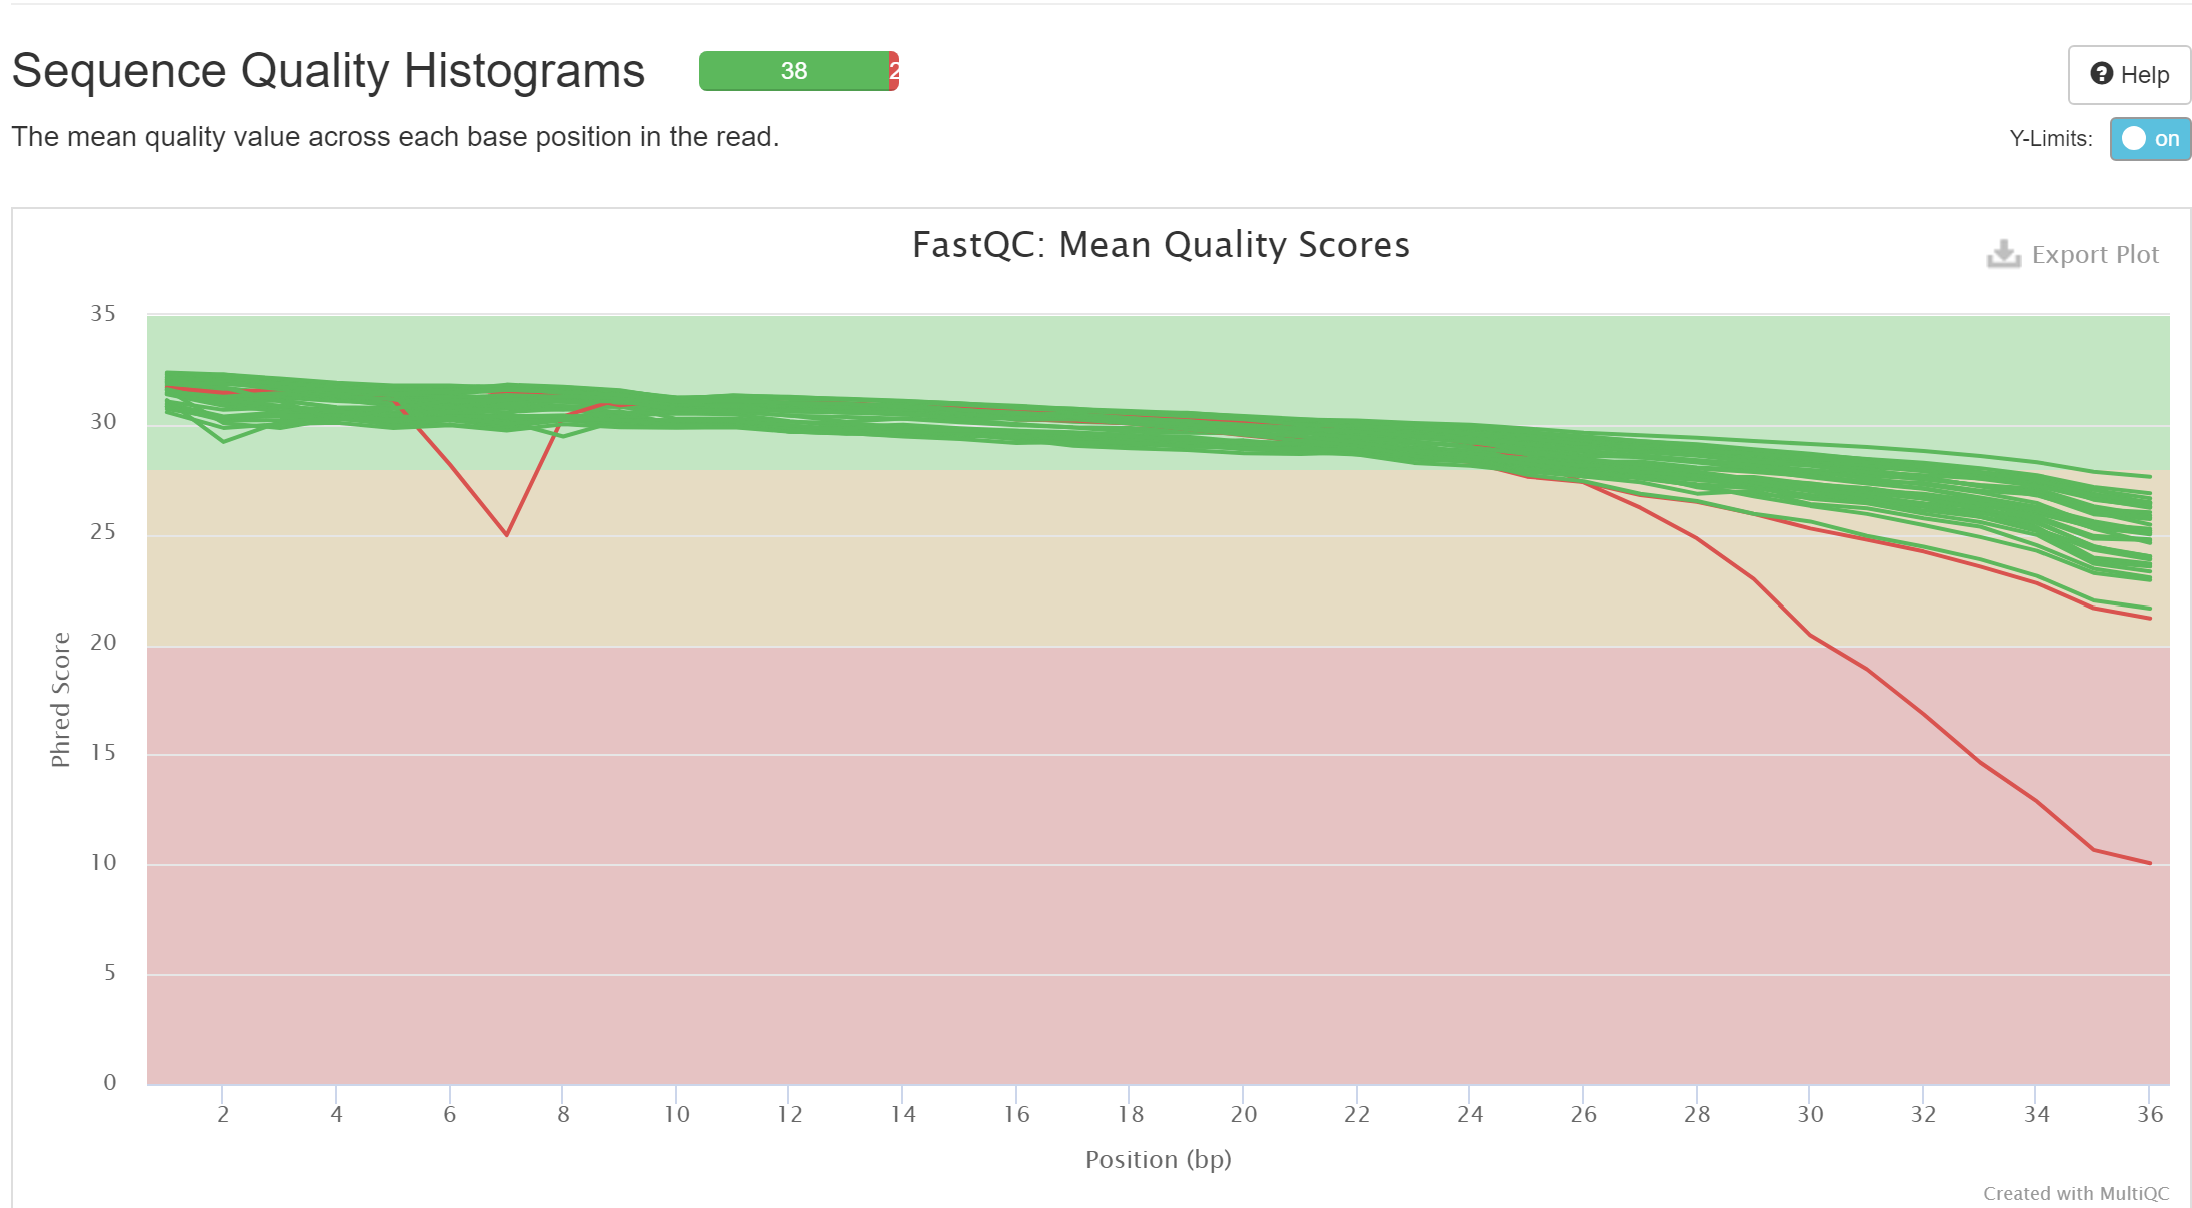

<div class="alert alert-block alert-danger">
    <h2>Remember!</h2>
    <p>The objective of this project is to make a comprehensive guide to RNA-seq + diffrential gene expression analysis. Every step/tool/command etc. that you use, should be justified and documented. Figures are always a plus.</p>
</div>

# **3. RNA-seq analysis**
### *Total Questions: 1*
### *Total Points:  150*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Align and quantify</h3>
    <p>Make sure to talk about the following:</p>
    <p><b>1:</b> Reference files used, where they were downloaded from, their specs etc.</p>
    <p><b>2:</b> The tool(s) you are using. We have Salmon, Kallisto, and Star installed in the environment.</p>
    <p><b>3:</b> Use markdown texts to clearly detail the process of alignment and quantification.</p>
    <p><b>4:</b> Show all the files being produced using bash commands.</p>
    <p><b>5:</b> As always, tool commands should be commented and logs should be displayed.</p>
</div>

The reference transcriptome and genome files were downloaded from Gencode's ftp site. We are working on homo sapien data, so the reference transcriptome and genome are both homo sapien.

We will be using Salmon for indexing and quantification

We will begin by downloading the necessary reference data.

In [2]:
### Make dir to store Reference Data
!mkdir /home/hice1/amohan321/scratch/Project5/Ref_data

In [3]:
### Download Reference transcriptome

!wget -P /home/hice1/amohan321/scratch/Project5/Ref_data/ ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.transcripts.fa.gz

--2023-11-30 15:38:40--  ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.transcripts.fa.gz
           => ‘/home/hice1/amohan321/scratch/Project5/Ref_data/gencode.v44.transcripts.fa.gz’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/gencode/Gencode_human/release_44 ... done.
==> SIZE gencode.v44.transcripts.fa.gz ... 82601810
==> PASV ... done.    ==> RETR gencode.v44.transcripts.fa.gz ... done.
Length: 82601810 (79M) (unauthoritative)

gencode.v44.transcr 100%[===================>]  78.77M  21.1MB/s    in 4.5s    

2023-11-30 15:38:46 (17.4 MB/s) - ‘/home/hice1/amohan321/scratch/Project5/Ref_data/gencode.v44.transcripts.fa.gz’ saved [82601810]



In [4]:
### Download Reference genome

!wget -P /home/hice1/amohan321/scratch/Project5/Ref_data/ ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/GRCh38.primary_assembly.genome.fa.gz

--2023-11-30 15:40:56--  ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/GRCh38.primary_assembly.genome.fa.gz
           => ‘/home/hice1/amohan321/scratch/Project5/Ref_data/GRCh38.primary_assembly.genome.fa.gz’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/gencode/Gencode_human/release_44 ... done.
==> SIZE GRCh38.primary_assembly.genome.fa.gz ... 844691642
==> PASV ... done.    ==> RETR GRCh38.primary_assembly.genome.fa.gz ... done.
Length: 844691642 (806M) (unauthoritative)

GRCh38.primary_asse 100%[===================>] 805.56M  28.6MB/s    in 29s     

2023-11-30 15:41:26 (28.2 MB/s) - ‘/home/hice1/amohan321/scratch/Project5/Ref_data/GRCh38.primary_assembly.genome.fa.gz’ saved [844691642]



In [6]:
### Create decoy file for indexing

!grep "^>" <(gunzip -c /home/hice1/amohan321/scratch/Project5/Ref_data/GRCh38.primary_assembly.genome.fa.gz) | cut -d " " -f 1 > /home/hice1/amohan321/scratch/Project5/Ref_data/decoys.txt

In [8]:
### Create a backup of the decoys.txt file in case if you want to use it later

!sed -i.bak -e 's/>//g' /home/hice1/amohan321/scratch/Project5/Ref_data/decoys.txt

In [10]:
### Combine the transcriptome and genome to be used as a single file for indexing

!cat /home/hice1/amohan321/scratch/Project5/Ref_data/gencode.v44.transcripts.fa.gz /home/hice1/amohan321/scratch/Project5/Ref_data/GRCh38.primary_assembly.genome.fa.gz > /home/hice1/amohan321/scratch/Project5/Ref_data/genome_tanscriptome.fa.gz

We are ready to index now!!

A typical Salmon indexing command will look like this:
./bin/salmon index -t transcripts.fa -i transcripts_index --decoys decoys.txt -k 31

We will use genmoe_transcriptome.fa.gz under the -t flag AND decoys.txt under the -d OR --decoys flag
We will need to make a new dir to save these indexes, produced from -i flag

In [12]:
### Make directory to store indexed data

!mkdir /home/hice1/amohan321/scratch/Project5/Index

In [1]:
### Run Salmon Index

!salmon index -t /home/hice1/amohan321/scratch/Project5/Ref_data/genome_tanscriptome.fa.gz -d /home/hice1/amohan321/scratch/Project5/Ref_data/decoys.txt -i /home/hice1/amohan321/scratch/Project5/Index/transcripts_index -k 31 -p 30

Version Server Response: Not Found
index ["/home/hice1/amohan321/scratch/Project5/Index/transcripts_index"] did not previously exist  . . . creating it
[2023-11-30 22:50:03.427] [jLog] [info] building index
out : /home/hice1/amohan321/scratch/Project5/Index/transcripts_index
[2023-11-30 22:50:03.428] [puff::index::jointLog] [info] Running fixFasta

[Step 1 of 4] : counting k-mers
[2023-11-30 22:50:03.497] [puff::index::jointLog] [warning] It appears that this may be a GENCODE transcriptome (from analyzing the separators in the FASTA header).  However, you have not set '|' as a header separator.  If this is a GENCODE transcriptome, consider passing --gencode to the pufferfish index command.


[2023-11-30 22:50:04.036] [puff::index::jointLog] [warning] Entry with header [ENST00000682202.1|ENSG00000243480.8|OTTHUMG00000011023.3|-|AMY2A-204|AMY2A|19|protein_coding_CDS_not_defined|], had length less than equal to the k-mer length of 31 (perhaps after poly-A clipping)
[2023-11-30 22:50:06.34

[2023-11-30 22:50:13.389] [puff::index::jointLog] [warning] Entry with header [ENST00000692460.1|ENSG00000140943.18|OTTHUMG00000137639.8|-|MBTPS1-217|MBTPS1|27|protein_coding|], had length less than equal to the k-mer length of 31 (perhaps after poly-A clipping)
[2023-11-30 22:50:13.642] [puff::index::jointLog] [warning] Entry with header [ENST00000579054.1|ENSG00000266416.1|OTTHUMG00000179204.1|OTTHUMT00000445280.1|ENST00000579054|ENSG00000266416|28|processed_pseudogene|], had length less than equal to the k-mer length of 31 (perhaps after poly-A clipping)
[2023-11-30 22:50:14.597] [puff::index::jointLog] [warning] Entry with header [ENST00000634174.1|ENSG00000282732.1|OTTHUMG00000191398.1|OTTHUMT00000487783.1|ENST00000634174|ENSG00000282732|28|unprocessed_pseudogene|], had length less than equal to the k-mer length of 31 (perhaps after poly-A clipping)

[2023-11-30 22:51:28.230] [puff::index::jointLog] [warning] Removed 880 transcripts that were sequence duplicates of indexed transcr

[2023-12-01 00:14:52.325] [puff::index::jointLog] [info] finished populating pos vector
[2023-12-01 00:14:52.325] [puff::index::jointLog] [info] writing index components
[2023-12-01 00:15:00.801] [puff::index::jointLog] [info] finished writing dense pufferfish index
[2023-12-01 00:15:02.128] [jLog] [info] done building index


In [4]:
### Show files produced by the above step

!ls -lh /home/hice1/amohan321/scratch/Project5/Index/transcripts_index

total 17G
-rw-r--r-- 1 amohan321 gtperson 985K Nov 30 22:51 complete_ref_lens.bin
-rw-r--r-- 1 amohan321 gtperson 2.9G Dec  1 00:12 ctable.bin
-rw-r--r-- 1 amohan321 gtperson 129M Dec  1 00:12 ctg_offsets.bin
-rw-r--r-- 1 amohan321 gtperson 183K Nov 30 22:51 duplicate_clusters.tsv
-rw-r--r-- 1 amohan321 gtperson 1.1K Dec  1 00:14 info.json
-rw-r--r-- 1 amohan321 gtperson 1.7G Dec  1 00:15 mphf.bin
-rw-r--r-- 1 amohan321 gtperson  10G Dec  1 00:14 pos.bin
-rw-r--r-- 1 amohan321 gtperson  115 Dec  1 00:15 pre_indexing.log
-rw-r--r-- 1 amohan321 gtperson 451M Dec  1 00:10 rank.bin
-rw-r--r-- 1 amohan321 gtperson 2.0M Dec  1 00:12 refAccumLengths.bin
-rw-r--r-- 1 amohan321 gtperson  20K Dec  1 00:15 ref_indexing.log
-rw-r--r-- 1 amohan321 gtperson 985K Dec  1 00:11 reflengths.bin
-rw-r--r-- 1 amohan321 gtperson 844M Dec  1 00:12 refseq.bin
-rw-r--r-- 1 amohan321 gtperson 902M Dec  1 00:10 seq.bin
-rw-r--r-- 1 amohan321 gtperson  127 Dec  1 00:15 versionInfo.json


for salmon quant:

<p>-i flag takes in the transcript index dor generated from previous step</p>
<p>-l flag (library type flag) is used to determine how the reads should be interpreted, and should be specified on the command line before the read files</p>
<p>-l A flag allows Salmon to automatically infer the library type</p>
<p>-1 and -2 flags for the paired end fastq files</p>
<p>--validateMapping allows for mapping algorithms use arbitrariy long matches between query and reference</p>
<p>-o flag points to thje output dir</p>

In [2]:
### Make directory to store quantification data

!mkdir /home/hice1/amohan321/scratch/Project5/Quant

In [1]:
### Run Salmon quant for every single trimmed file in a loop

!for file in $(cat /home/hice1/amohan321/my_version_biol6150/Project5_6/SRR_Acc_List.txt); do salmon quant -i /home/hice1/amohan321/scratch/Project5/Index/transcripts_index/ -l A -1 /home/hice1/amohan321/scratch/Project5/Trimmed_data/${file}_trimmed_1.fastq.gz -2 /home/hice1/amohan321/scratch/Project5/Trimmed_data/${file}_trimmed_2.fastq.gz --validateMappings -o /home/hice1/amohan321/scratch/Project5/Quant/${file}_quant -p 30; done


Version Server Response: Not Found
### salmon (selective-alignment-based) v1.10.2
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /home/hice1/amohan321/scratch/Project5/Index/transcripts_index/ }
### [ libType ] => { A }
### [ mates1 ] => { /home/hice1/amohan321/scratch/Project5/Trimmed_data/SRR057649_trimmed_1.fastq.gz }
### [ mates2 ] => { /home/hice1/amohan321/scratch/Project5/Trimmed_data/SRR057649_trimmed_2.fastq.gz }
### [ validateMappings ] => { }
### [ output ] => { /home/hice1/amohan321/scratch/Project5/Quant/SRR057649_quant }
### [ threads ] => { 30 }
Logs will be written to /home/hice1/amohan321/scratch/Project5/Quant/SRR057649_quant/logs
[2023-12-04 16:46:02.395] [jointLog] [info] setting maxHashResizeThreads to 30
[2023-12-04 16:46:02.395] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2023-12-04 16:46:02.395] [jointLog] [info] Usage of --validateMappings implies use of minScoreFraction. S

size = 37302779
-----------------------------------------
| Loading contig offsets | Time = 146.07 ms
-----------------------------------------
-----------------------------------------
| Loading reference lengths | Time = 20.165 ms
-----------------------------------------
-----------------------------------------
| Loading mphf table | Time = 2.2573 s
-----------------------------------------
size = 3781971583
Number of ones: 37302778
Number of ones per inventory item: 512
Inventory entries filled: 72857
-----------------------------------------
| Loading contig boundaries | Time = 9.1296 s
-----------------------------------------
size = 3781971583
-----------------------------------------
| Loading sequence | Time = 912.82 ms
-----------------------------------------
size = 2662888243
-----------------------------------------
| Loading positions | Time = 15.191 s
-----------------------------------------
size = 3536939191
-----------------------------------------
| Loading referenc

[2023-12-04 16:51:59.275] [jointLog] [info] iteration = 100 | max rel diff. = 17.2009
[2023-12-04 16:52:01.526] [jointLog] [info] iteration = 200 | max rel diff. = 12.5111
[2023-12-04 16:52:03.779] [jointLog] [info] iteration = 300 | max rel diff. = 2.63797
[2023-12-04 16:52:06.033] [jointLog] [info] iteration = 400 | max rel diff. = 1.66312
[2023-12-04 16:52:08.287] [jointLog] [info] iteration = 500 | max rel diff. = 0.655945
[2023-12-04 16:52:10.536] [jointLog] [info] iteration = 600 | max rel diff. = 1.18835
[2023-12-04 16:52:12.787] [jointLog] [info] iteration = 700 | max rel diff. = 0.510166
[2023-12-04 16:52:15.046] [jointLog] [info] iteration = 800 | max rel diff. = 0.238457
[2023-12-04 16:52:17.295] [jointLog] [info] iteration = 900 | max rel diff. = 0.618059
[2023-12-04 16:52:19.549] [jointLog] [info] iteration = 1,000 | max rel diff. = 1.22054
[2023-12-04 16:52:21.804] [jointLog] [info] iteration = 1,100 | max rel diff. = 0.869108
[2023-12-04 16:52:24.055] [jointLog] [info] i

Version Server Response: Not Found
### salmon (selective-alignment-based) v1.10.2
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /home/hice1/amohan321/scratch/Project5/Index/transcripts_index/ }
### [ libType ] => { A }
### [ mates1 ] => { /home/hice1/amohan321/scratch/Project5/Trimmed_data/SRR057653_trimmed_1.fastq.gz }
### [ mates2 ] => { /home/hice1/amohan321/scratch/Project5/Trimmed_data/SRR057653_trimmed_2.fastq.gz }
### [ validateMappings ] => { }
### [ output ] => { /home/hice1/amohan321/scratch/Project5/Quant/SRR057653_quant }
### [ threads ] => { 30 }
Logs will be written to /home/hice1/amohan321/scratch/Project5/Quant/SRR057653_quant/logs
[2023-12-04 16:53:52.852] [jointLog] [info] setting maxHashResizeThreads to 30
[2023-12-04 16:53:52.852] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2023-12-04 16:53:52.852] [jointLog] [info] Usage of --validateMappings implies use of minScoreFraction. S

Number of ones: 37302778
Number of ones per inventory item: 512
Inventory entries filled: 72857
-----------------------------------------
| Loading contig boundaries | Time = 9.7475 s
-----------------------------------------
size = 3781971583
-----------------------------------------
| Loading sequence | Time = 1.6912 s
-----------------------------------------
size = 2662888243
-----------------------------------------
| Loading positions | Time = 6.8996 s
-----------------------------------------
size = 3536939191
-----------------------------------------
| Loading reference sequence | Time = 528.85 ms
-----------------------------------------
-----------------------------------------
| Loading reference accumulative lengths | Time = 1.8889 ms
-----------------------------------------
[2023-12-04 16:55:50.910] [jointLog] [info] done
[2023-12-04 16:55:50.947] [jointLog] [info] Index contained 252,149 targets
[2023-12-04 16:55:51.020] [jointLog] [info] Number of decoys : 194
[2023-12-

[2023-12-04 16:57:55.915] [jointLog] [info] done
[2023-12-04 16:57:55.952] [jointLog] [info] Index contained 252,149 targets
[2023-12-04 16:57:56.025] [jointLog] [info] Number of decoys : 194
[2023-12-04 16:57:56.025] [jointLog] [info] First decoy index : 251,913 




[2023-12-04 16:57:56.403] [jointLog] [info] Automatically detected most likely library type as IU

processed 500,000 fragments
processed 1,000,000 fragments
processed 1,500,000 fragments
processed 2,000,000 fragments
processed 2,500,000 fragments
processed 3,000,000 fragments
processed 3,500,001 fragments
processed 4,000,001 fragments
processed 4,500,000 fragments
processed 5,000,000 fragments
processed 5,500,000 fragments
processed 6,000,000 fragments
processed 6,500,000 fragments
processed 7,000,000 fragments
processed 7,500,000 fragments
processed 8,000,000 fragments
processed 8,500,000 fragments
processed 9,000,000 fragments
processed 9,500,000 fragments
processed 10,000,000 fragments
hits: 52,628,028, hits per frag: 

processed 500,001 fragments
processed 1,000,000 fragments
processed 1,500,000 fragments
processed 2,000,001 fragments
processed 2,500,000 fragments
processed 3,000,000 fragments
processed 3,500,000 fragments
processed 4,000,000 fragments
processed 4,500,000 fragments
processed 5,000,000 fragments
processed 5,500,000 fragments
processed 6,000,000 fragments
processed 6,500,000 fragments
processed 7,000,000 fragments
processed 7,500,000 fragments
processed 8,000,000 fragments
processed 8,500,000 fragments
processed 9,000,000 fragments
hits: 47,915,596, hits per frag:  5.35615



[2023-12-04 17:00:35.785] [jointLog] [info] Computed 491,875 rich equivalence classes for further processing
[2023-12-04 17:00:35.785] [jointLog] [info] Counted 8,155,441 total reads in the equivalence classes 




[2023-12-04 17:00:35.810] [jointLog] [info] Number of mappings discarded because of alignment score : 65,593
[2023-12-04 17:00:35.810] [jointLog] [info] Number of fragments entirely discarded because of

TBB Warning: The number of workers is currently limited to 7. The request for 29 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

[2023-12-04 17:02:30.543] [jointLog] [info] Marked 0 weighted equivalence classes as degenerate
[2023-12-04 17:02:30.566] [jointLog] [info] iteration = 0 | max rel diff. = 2276.77
[2023-12-04 17:02:32.661] [jointLog] [info] iteration = 100 | max rel diff. = 18.6901
[2023-12-04 17:02:34.751] [jointLog] [info] iteration = 200 | max rel diff. = 11.0325
[2023-12-04 17:02:36.843] [jointLog] [info] iteration = 300 | max rel diff. = 1.07432
[2023-12-04 17:02:38.930] [jointLog] [info] iteration = 400 | max rel diff. = 14.5385
[2023-12-04 17:02:41.016] [jointLog] [info] iteration = 500 | max rel diff. = 2.91654
[2023-12-04 17:02:43.101] [jointLog] [info] iteration = 600 | max rel diff. = 0.723945
[2023-12-04 17:02:45.185] [jointLog] [info] iteration = 700 | max rel diff. = 0.123048
[2023-12-04 17:02:47.270] [joi

[2023-12-04 17:04:20.830] [jointLog] [info] iteration = 700 | max rel diff. = 0.666446
[2023-12-04 17:04:22.486] [jointLog] [info] iteration = 800 | max rel diff. = 2.48607
[2023-12-04 17:04:24.141] [jointLog] [info] iteration = 900 | max rel diff. = 0.0879053
[2023-12-04 17:04:25.794] [jointLog] [info] iteration = 1,000 | max rel diff. = 0.348652
[2023-12-04 17:04:27.447] [jointLog] [info] iteration = 1,100 | max rel diff. = 0.164969
[2023-12-04 17:04:29.100] [jointLog] [info] iteration = 1,200 | max rel diff. = 0.174507
[2023-12-04 17:04:29.216] [jointLog] [info] iteration = 1,208 | max rel diff. = 0.00397078
[2023-12-04 17:04:29.231] [jointLog] [info] Finished optimizer
[2023-12-04 17:04:29.231] [jointLog] [info] writing output 

Version Server Response: Not Found
### salmon (selective-alignment-based) v1.10.2
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /home/hice1/amohan321/scratch/Project5/Index/transcripts_index/ }
### [ libType ] => { A }
### [ mates1

-----------------------------------------
| Loading contig table | Time = 25.414 s
-----------------------------------------
size = 37302779
-----------------------------------------
| Loading contig offsets | Time = 133.51 ms
-----------------------------------------
-----------------------------------------
| Loading reference lengths | Time = 24.212 ms
-----------------------------------------
-----------------------------------------
| Loading mphf table | Time = 1.1746 s
-----------------------------------------
size = 3781971583
Number of ones: 37302778
Number of ones per inventory item: 512
Inventory entries filled: 72857
-----------------------------------------
| Loading contig boundaries | Time = 8.9741 s
-----------------------------------------
size = 3781971583
-----------------------------------------
| Loading sequence | Time = 779.66 ms
-----------------------------------------
size = 2662888243
-----------------------------------------
| Loading positions | Time = 7.76

-----------------------------------------
| Loading reference sequence | Time = 501.31 ms
-----------------------------------------
-----------------------------------------
| Loading reference accumulative lengths | Time = 1.8117 ms
-----------------------------------------
[2023-12-04 17:08:07.876] [jointLog] [info] done
[2023-12-04 17:08:07.914] [jointLog] [info] Index contained 252,149 targets
[2023-12-04 17:08:07.988] [jointLog] [info] Number of decoys : 194
[2023-12-04 17:08:07.988] [jointLog] [info] First decoy index : 251,913 




[2023-12-04 17:08:08.421] [jointLog] [info] Automatically detected most likely library type as IU

processed 500,000 fragments
processed 1,000,000 fragments
processed 1,500,000 fragments
processed 2,000,000 fragments
processed 2,500,000 fragments
processed 3,000,000 fragments
processed 3,500,000 fragments
processed 4,000,000 fragments
processed 4,500,000 fragments
processed 5,500,000 fragments
processed 6,000,000 fragments
processed 6,500,000 fragment

[2023-12-04 17:10:22.309] [jointLog] [info] Automatically detected most likely library type as IU

processed 500,000 fragments
processed 1,000,000 fragments
processed 1,500,000 fragments
processed 2,000,000 fragments
processed 2,500,002 fragments
hits: 11,682,058, hits per frag:  4.77687







TBB Warning: The number of workers is currently limited to 7. The request for 29 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

[2023-12-04 17:10:31.241] [jointLog] [info] Computed 301,579 rich equivalence classes for further processing
[2023-12-04 17:10:31.241] [jointLog] [info] Counted 2,199,396 total reads in the equivalence classes 
[2023-12-04 17:10:31.267] [jointLog] [info] Number of mappings discarded because of alignment score : 19,830
[2023-12-04 17:10:31.267] [jointLog] [info] Number of fragments entirely discarded because of alignment score : 36,724
[2023-12-04 17:10:31.267] [jointLog] [info] Number of fragments discarded becau

[2023-12-04 17:12:22.710] [jointLog] [info] Marked 0 weighted equivalence classes as degenerate
[2023-12-04 17:12:22.739] [jointLog] [info] iteration = 0 | max rel diff. = 3389.74
[2023-12-04 17:12:25.464] [jointLog] [info] iteration = 100 | max rel diff. = 20.8108
[2023-12-04 17:12:28.182] [jointLog] [info] iteration = 200 | max rel diff. = 9.02026
[2023-12-04 17:12:30.898] [jointLog] [info] iteration = 300 | max rel diff. = 15.296
[2023-12-04 17:12:33.614] [jointLog] [info] iteration = 400 | max rel diff. = 18.2241
[2023-12-04 17:12:36.329] [jointLog] [info] iteration = 500 | max rel diff. = 0.474696
[2023-12-04 17:12:39.045] [jointLog] [info] iteration = 600 | max rel diff. = 0.623996
[2023-12-04 17:12:41.762] [jointLog] [info] iteration = 700 | max rel diff. = 10.8782
[2023-12-04 17:12:44.480] [jointLog] [info] iteration = 800 | max rel diff. = 9.48725
[2023-12-04 17:12:47.196] [jointLog] [info] iteration = 900 | max rel diff. = 0.414495
[2023-12-04 17:12:49.910] [jointLog] [info] 

[2023-12-04 17:14:55.324] [jointLog] [info] iteration = 700 | max rel diff. = 6.96855
[2023-12-04 17:14:57.460] [jointLog] [info] iteration = 800 | max rel diff. = 0.207323
[2023-12-04 17:14:59.596] [jointLog] [info] iteration = 900 | max rel diff. = 1.89133
[2023-12-04 17:15:01.731] [jointLog] [info] iteration = 1,000 | max rel diff. = 0.471203
[2023-12-04 17:15:03.865] [jointLog] [info] iteration = 1,100 | max rel diff. = 0.212158
[2023-12-04 17:15:06.000] [jointLog] [info] iteration = 1,200 | max rel diff. = 0.414121
[2023-12-04 17:15:08.133] [jointLog] [info] iteration = 1,300 | max rel diff. = 0.013085
[2023-12-04 17:15:10.266] [jointLog] [info] iteration = 1,400 | max rel diff. = 0.0181276
[2023-12-04 17:15:12.407] [jointLog] [info] iteration = 1,500 | max rel diff. = 0.0562631
[2023-12-04 17:15:14.541] [jointLog] [info] iteration = 1,600 | max rel diff. = 0.174097
[2023-12-04 17:15:16.669] [jointLog] [info] iteration = 1,700 | max rel diff. = 0.130593
[2023-12-04 17:15:18.799] [

[2023-12-04 17:17:15.260] [jointLog] [info] iteration = 1,100 | max rel diff. = 0.244807
[2023-12-04 17:17:17.736] [jointLog] [info] iteration = 1,200 | max rel diff. = 0.214973
[2023-12-04 17:17:20.211] [jointLog] [info] iteration = 1,300 | max rel diff. = 0.4652
[2023-12-04 17:17:22.690] [jointLog] [info] iteration = 1,400 | max rel diff. = 1.67828
[2023-12-04 17:17:25.167] [jointLog] [info] iteration = 1,500 | max rel diff. = 0.058527
[2023-12-04 17:17:27.642] [jointLog] [info] iteration = 1,600 | max rel diff. = 0.187917
[2023-12-04 17:17:30.121] [jointLog] [info] iteration = 1,700 | max rel diff. = 0.0191317
[2023-12-04 17:17:32.599] [jointLog] [info] iteration = 1,800 | max rel diff. = 0.279543
[2023-12-04 17:17:35.075] [jointLog] [info] iteration = 1,900 | max rel diff. = 0.0524863
[2023-12-04 17:17:36.931] [jointLog] [info] iteration = 1,976 | max rel diff. = 0.00249921
[2023-12-04 17:17:36.946] [jointLog] [info] Finished optimizer
[2023-12-04 17:17:36.946] [jointLog] [info] wr

[2023-12-04 17:19:34.716] [jointLog] [info] iteration = 1,000 | max rel diff. = 1.71616
[2023-12-04 17:19:37.445] [jointLog] [info] iteration = 1,100 | max rel diff. = 0.226758
[2023-12-04 17:19:40.172] [jointLog] [info] iteration = 1,200 | max rel diff. = 0.24297
[2023-12-04 17:19:42.919] [jointLog] [info] iteration = 1,300 | max rel diff. = 0.219852
[2023-12-04 17:19:45.657] [jointLog] [info] iteration = 1,400 | max rel diff. = 2.35633
[2023-12-04 17:19:48.383] [jointLog] [info] iteration = 1,500 | max rel diff. = 0.120783
[2023-12-04 17:19:51.110] [jointLog] [info] iteration = 1,600 | max rel diff. = 0.0680331
[2023-12-04 17:19:52.012] [jointLog] [info] iteration = 1,634 | max rel diff. = 0.0062669
[2023-12-04 17:19:52.027] [jointLog] [info] Finished optimizer
[2023-12-04 17:19:52.027] [jointLog] [info] writing output 

Version Server Response: Not Found
### salmon (selective-alignment-based) v1.10.2
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /home/hice1

In [2]:
### Show files produced by the above step

!ls -lh /home/hice1/amohan321/scratch/Project5/Quant/

total 84K
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:04 SRR057629_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:05 SRR057630_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:07 SRR057632_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:09 SRR057633_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:10 SRR057634_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:13 SRR057638_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:15 SRR057639_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:17 SRR057644_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:19 SRR057645_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 17:21 SRR057646_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 16:47 SRR057649_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 16:49 SRR057650_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 16:50 SRR057651_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 16:53 SRR057652_quant
drwxr-xr-x 5 amohan321 gtperson 4.0K Dec  4 16:55 SRR057653_quant


# **4. Diffrential gene expression**
### *Total Questions: 1*
### *Total Points: 150*


---

<div class="alert alert-block alert-warning">
    <h3>4.1 Analysis</h3>
    <p>Use the tools of your choice. Python based DeSeq2 code can go in this notebook, and R code can be implemented on the RStudion on Pace-ICE. Make sure to clearly explain (in this notebook) what and how your analysis is performed.</p>
    <p><b>Note:</b> If you use Pace-ICE RStudio for this analysis, then make sure to submit that script separately. Please name the script <b><u>DiffrentialGeneExpression.R</u></b> and keep it next to this notebook in the directory structure. You can still put some description of that script here.</p>
    <hr>
    <p><b>A good solution:</b> Although not necessary, but you can check if your RScript can take arguments. By doing this, you will be able to use your RScript as a command line tool and call it from this notebook. This ensures automation and the command to run diffrential gene expression would be the same for 20 vs 2000 files.</p>
    
</div>

In [3]:
### Make new dir to save all the renamed quant files
!mkdir /home/hice1/amohan321/scratch/Project5/renamed_Quant

In [5]:
### We need to rename the quant.sf files for each sample to its specific unique name and move it to a new folder
!for file in $(cat /home/hice1/amohan321/my_version_biol6150/Project5_6/SRR_Acc_List.txt); do mv /home/hice1/amohan321/scratch/Project5/Quant/${file}_quant/quant.sf /home/hice1/amohan321/scratch/Project5/renamed_Quant/${file}.sf; done

In [6]:
### Show files produced by the above step

!ls -lh /home/hice1/amohan321/scratch/Project5/renamed_Quant/

total 693M
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:04 SRR057629.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:05 SRR057630.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:07 SRR057632.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:09 SRR057633.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:10 SRR057634.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:13 SRR057638.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:15 SRR057639.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:17 SRR057644.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:19 SRR057645.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 17:21 SRR057646.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 16:47 SRR057649.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 16:49 SRR057650.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 16:50 SRR057651.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 16:53 SRR057652.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 16:55 SRR057653.sf
-rw-r--r-- 1 amohan321 gtperson 35M Dec  4 16:57 SRR057654.

# **5. Summarize and visualize**
### *Total Questions: 3*
### *Total Points: 30+35+35+50(bonus) = 100*


---

<div class="alert alert-block alert-warning">
    <h3>5.1 Summarize you findings</h3>
    <p>Use bash commands to show your DeSeq2 results. Filter for different p-value thresholds and report your findings. Quickly check if the genes reported in the source study are also found as diffrentially expressed in your analysis.</p>
</div>

In [9]:
### Add cells for commands, comments and important points to keep in mind.
!head /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv

"","baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"
"ENST00000456328.2|ENSG00000290825.1|-|OTTHUMT00000362751.1|DDX11L2-202|DDX11L2|1657|lncRNA|",1.11453168375324,-3.29031730223933,2.31121205019324,-1.42363280857947,0.154552793340383,NA
"ENST00000450305.2|ENSG00000223972.6|OTTHUMG00000000961.2|OTTHUMT00000002844.2|DDX11L1-201|DDX11L1|632|transcribed_unprocessed_pseudogene|",0,NA,NA,NA,NA,NA
"ENST00000488147.1|ENSG00000227232.5|OTTHUMG00000000958.1|OTTHUMT00000002839.1|WASH7P-201|WASH7P|1351|unprocessed_pseudogene|",6.4122549126696,-0.440226599009467,1.69942304838861,-0.259044738405125,0.795600722018567,0.999934073819773
"ENST00000619216.1|ENSG00000278267.1|-|-|MIR6859-1-201|MIR6859-1|68|miRNA|",0.875457595614171,-0.637453536757266,1.41562603362295,-0.450297975324641,0.652495598705934,NA
"ENST00000473358.1|ENSG00000243485.5|OTTHUMG00000000959.2|OTTHUMT00000002840.1|MIR1302-2HG-202|MIR1302-2HG|712|lncRNA|",0,NA,NA,NA,NA,NA
"ENST00000469289.1|ENSG00000243485.5|OTTHUMG00000000959

In [19]:
!awk -F, '$3 < 0.05 {print $1, $2, $3}' /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv | head -n 10 
!awk -F, '$3 < 0.005 {print $1, $2, $3}' /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv | head -n 10

In [18]:
#Running Awk to find top 6 up and down regulated genes from the study. Anything over 0 signifies a found result.
!awk -F',' '$1 ~ /PLA2G2A/' /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv | wc -l
!awk -F',' '$1 ~ /ORM1/' /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv | wc -l
!awk -F',' '$1 ~ /TARP/' /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv | wc -l
!awk -F',' '$1 ~ /SERPINA3/' /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv | wc -l
!awk -F',' '$1 ~ /LTF/' /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv | wc -l
!awk -F',' '$1 ~ /SAA1/' /home/hice1/cwijeyesekera3/scratch/Data/Project5/DE_results_filtered.csv | wc -l

6
2
2
9
33
5


Our analysis did find many of the genes that the study found differentially expressed. 

<div class="alert alert-block alert-warning">
    <h3>5.2 Volcano plots</h3>
    <p>Visualize your diffrentailly expressed transcripts using a volcano plot and annotate the transcripts of interest.</p>
</div>

In [ ]:
# Plots generated from R script

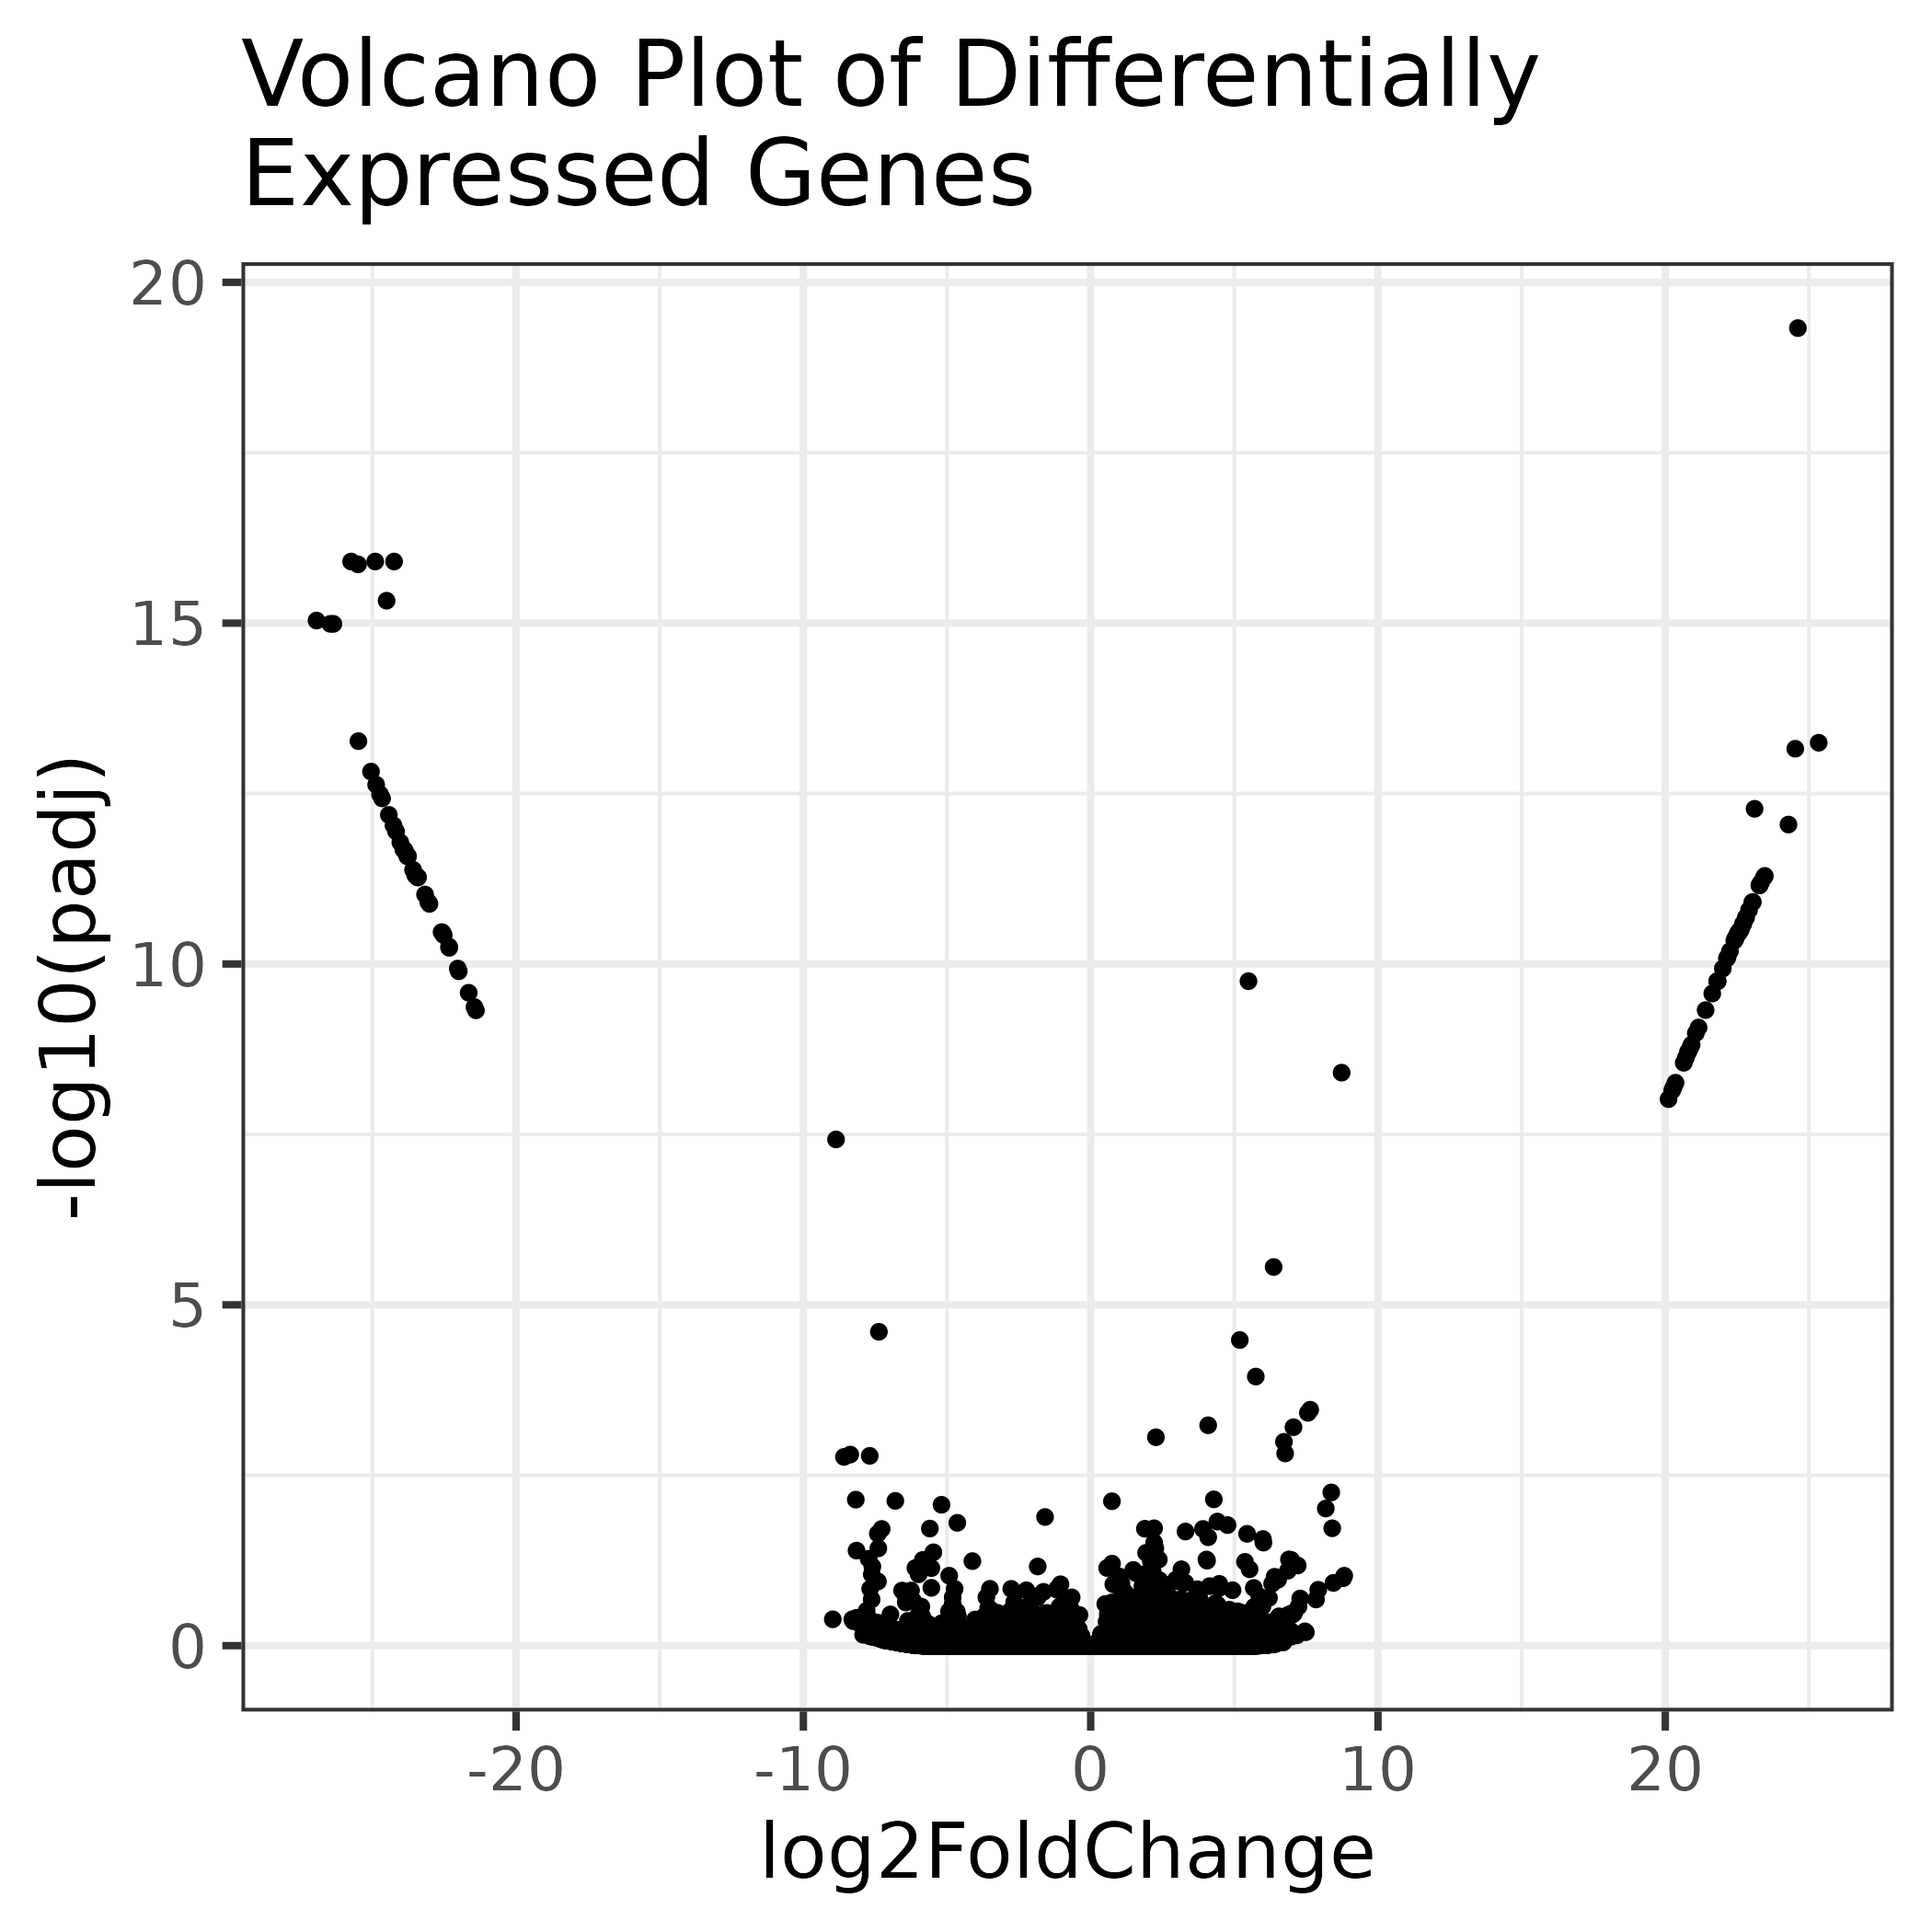

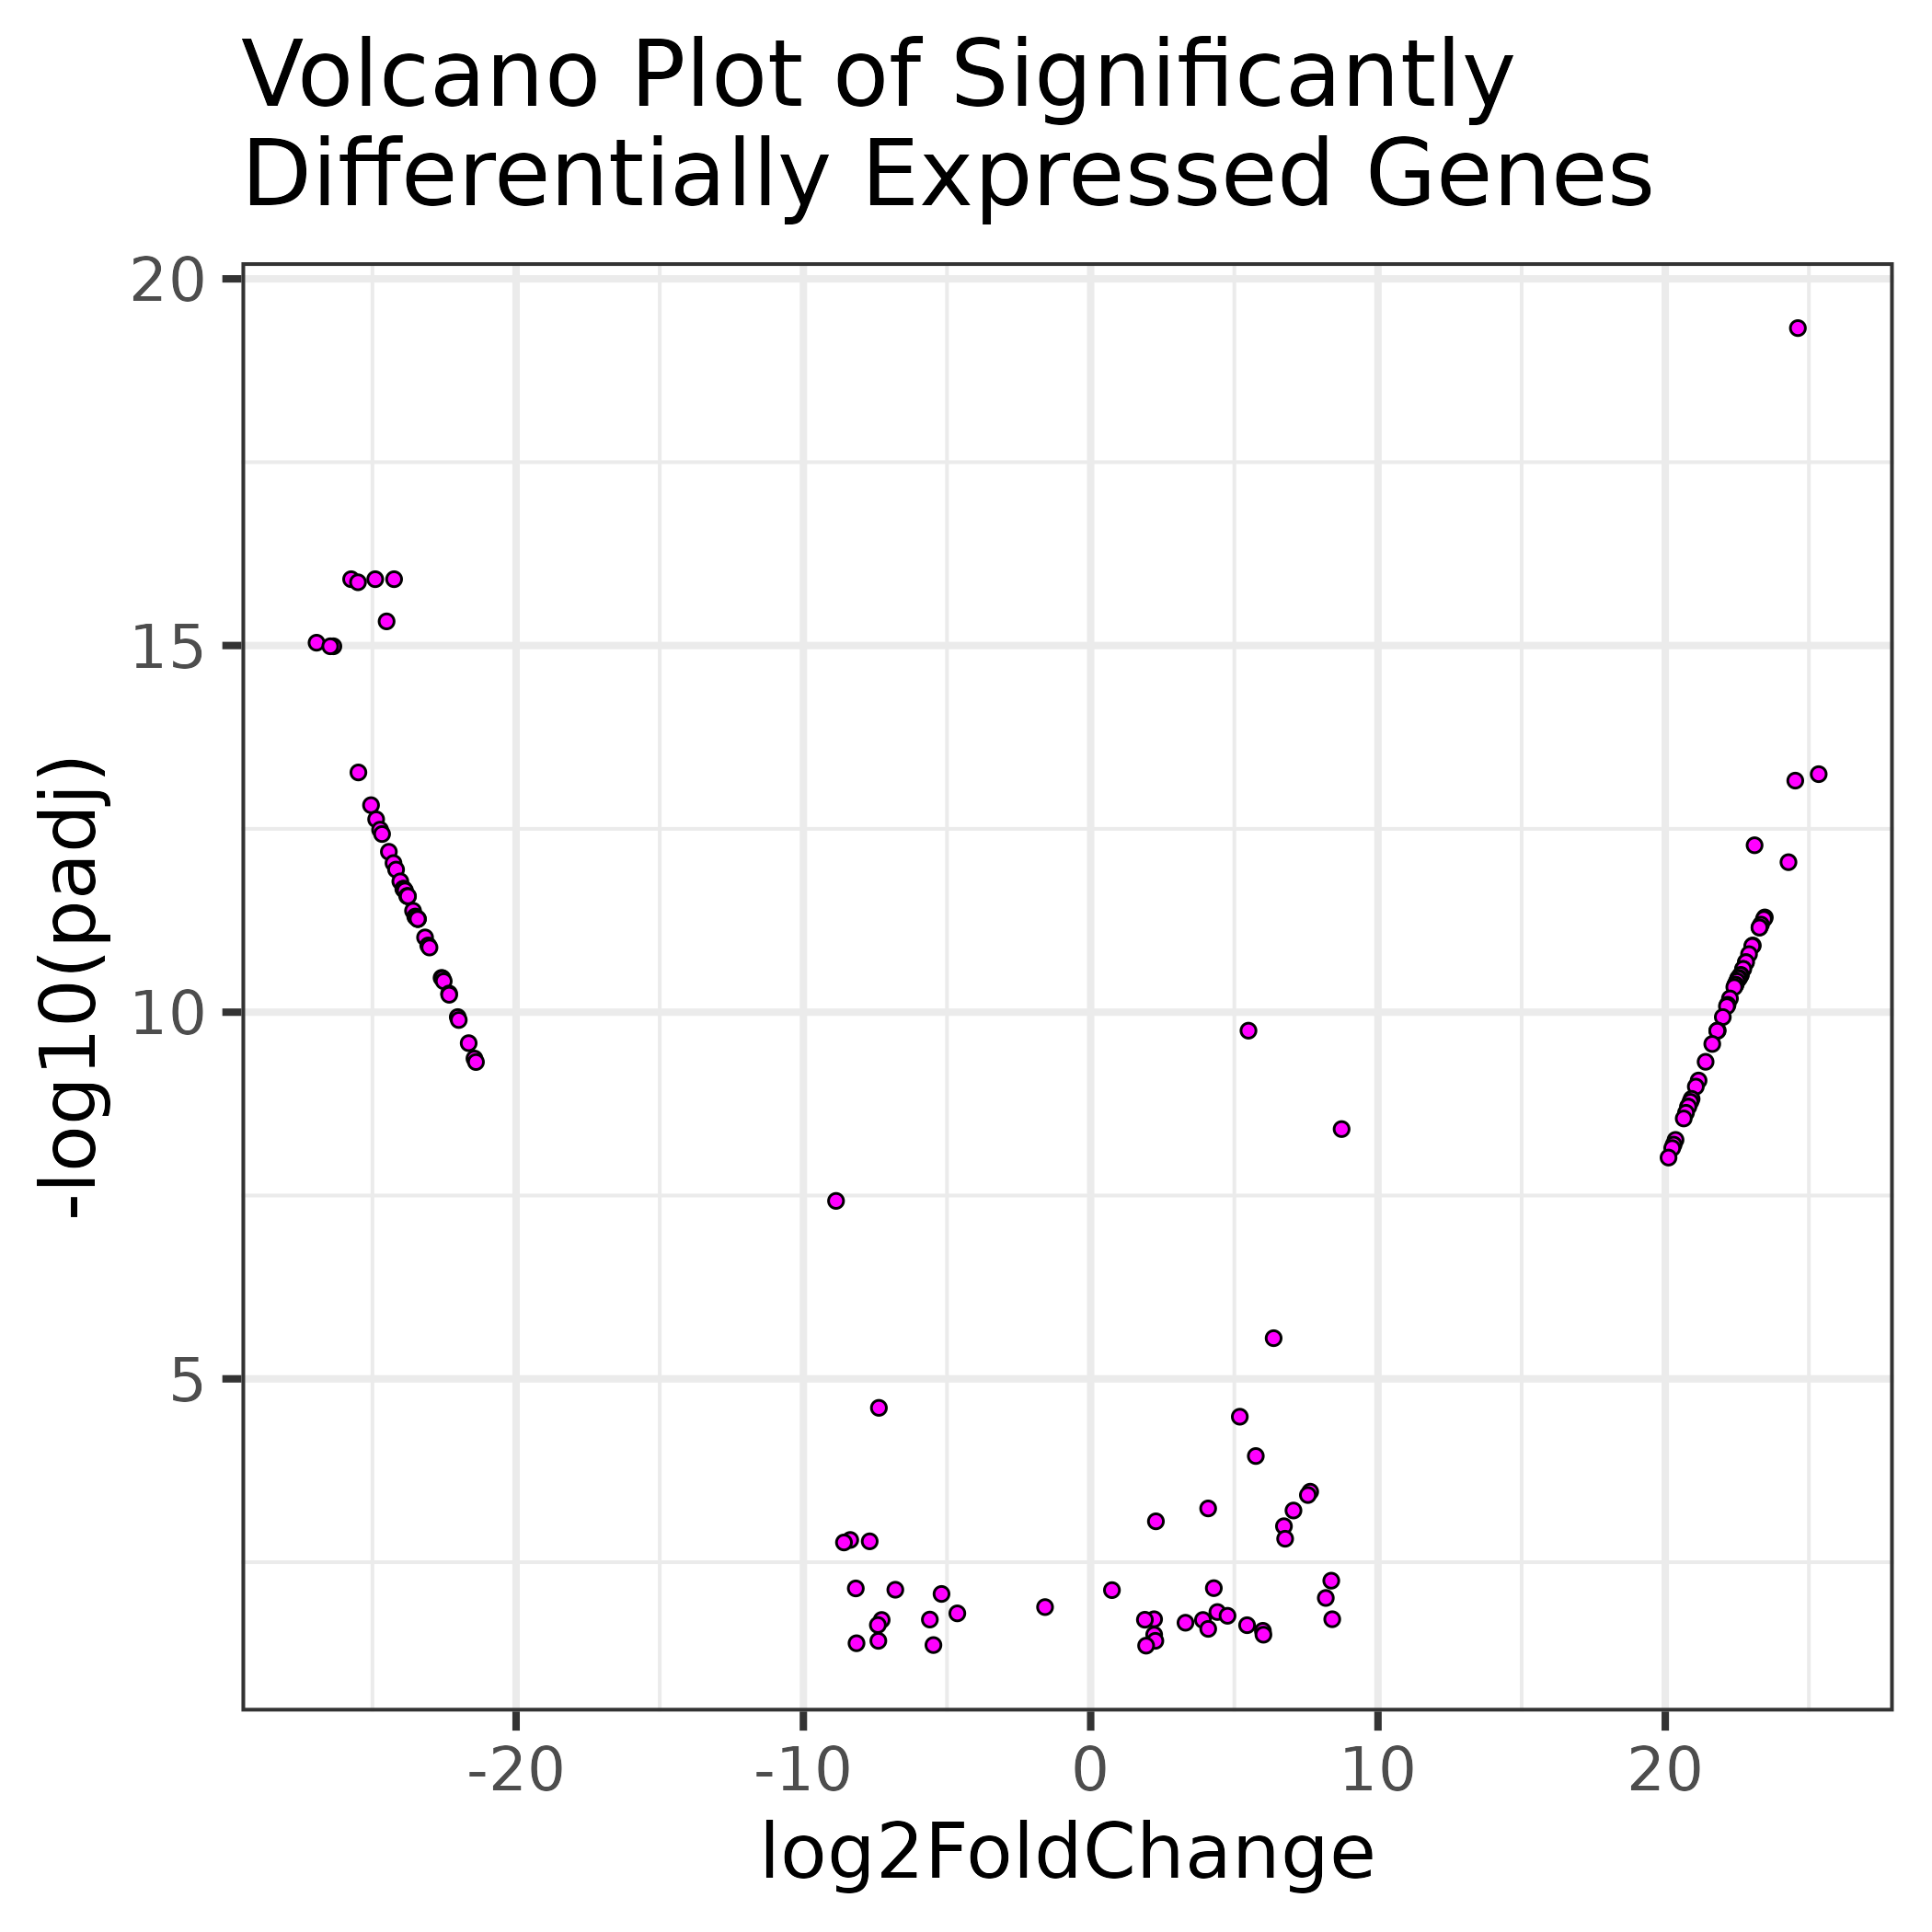

<div class="alert alert-block alert-warning">
    <h3>5.3 Top findings</h3>
    <p>Select 2 differentially expressed transcripts with lowest p-value. Using box plots or points, show that the normalized counts (that you got from Salmon or other tools) are actually different between cases and controls.</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>5.4 Bonus Question</h3>
    <p>Look into how else you could represent your findings. Heatmaps? PCA? Something else? Make 1 or 2 figures for some extra points.</p>
</div>

In [ ]:
### Add cells for commands, comments and important points to keep in mind.